In [6]:
import open3d as o3d
import open3d_tutorial as o3dtut
import numpy as np
import copy

In [2]:
print("Testing mesh in open3d ...")
mesh = o3dtut.get_knot_mesh()
print(mesh)
print('Vertices:')
print(np.asarray(mesh.vertices))
print('Triangles:')
print(np.asarray(mesh.triangles))

Testing mesh in open3d ...
geometry::TriangleMesh with 1440 points and 2880 triangles.
Vertices:
[[  4.51268387  28.68865967 -76.55680847]
 [  7.63622284  35.52046967 -69.78063965]
 [  6.21986008  44.22465134 -64.82303619]
 ...
 [-22.12651634  31.28466606 -87.37570953]
 [-13.91188431  25.4865818  -86.25827026]
 [ -5.27768707  23.36245346 -81.43279266]]
Triangles:
[[   0   12   13]
 [   0   13    1]
 [   1   13   14]
 ...
 [1438   11 1439]
 [1439   11    0]
 [1439    0 1428]]


Try to render a mesh with normals (exist: True) and colors (exist: False)


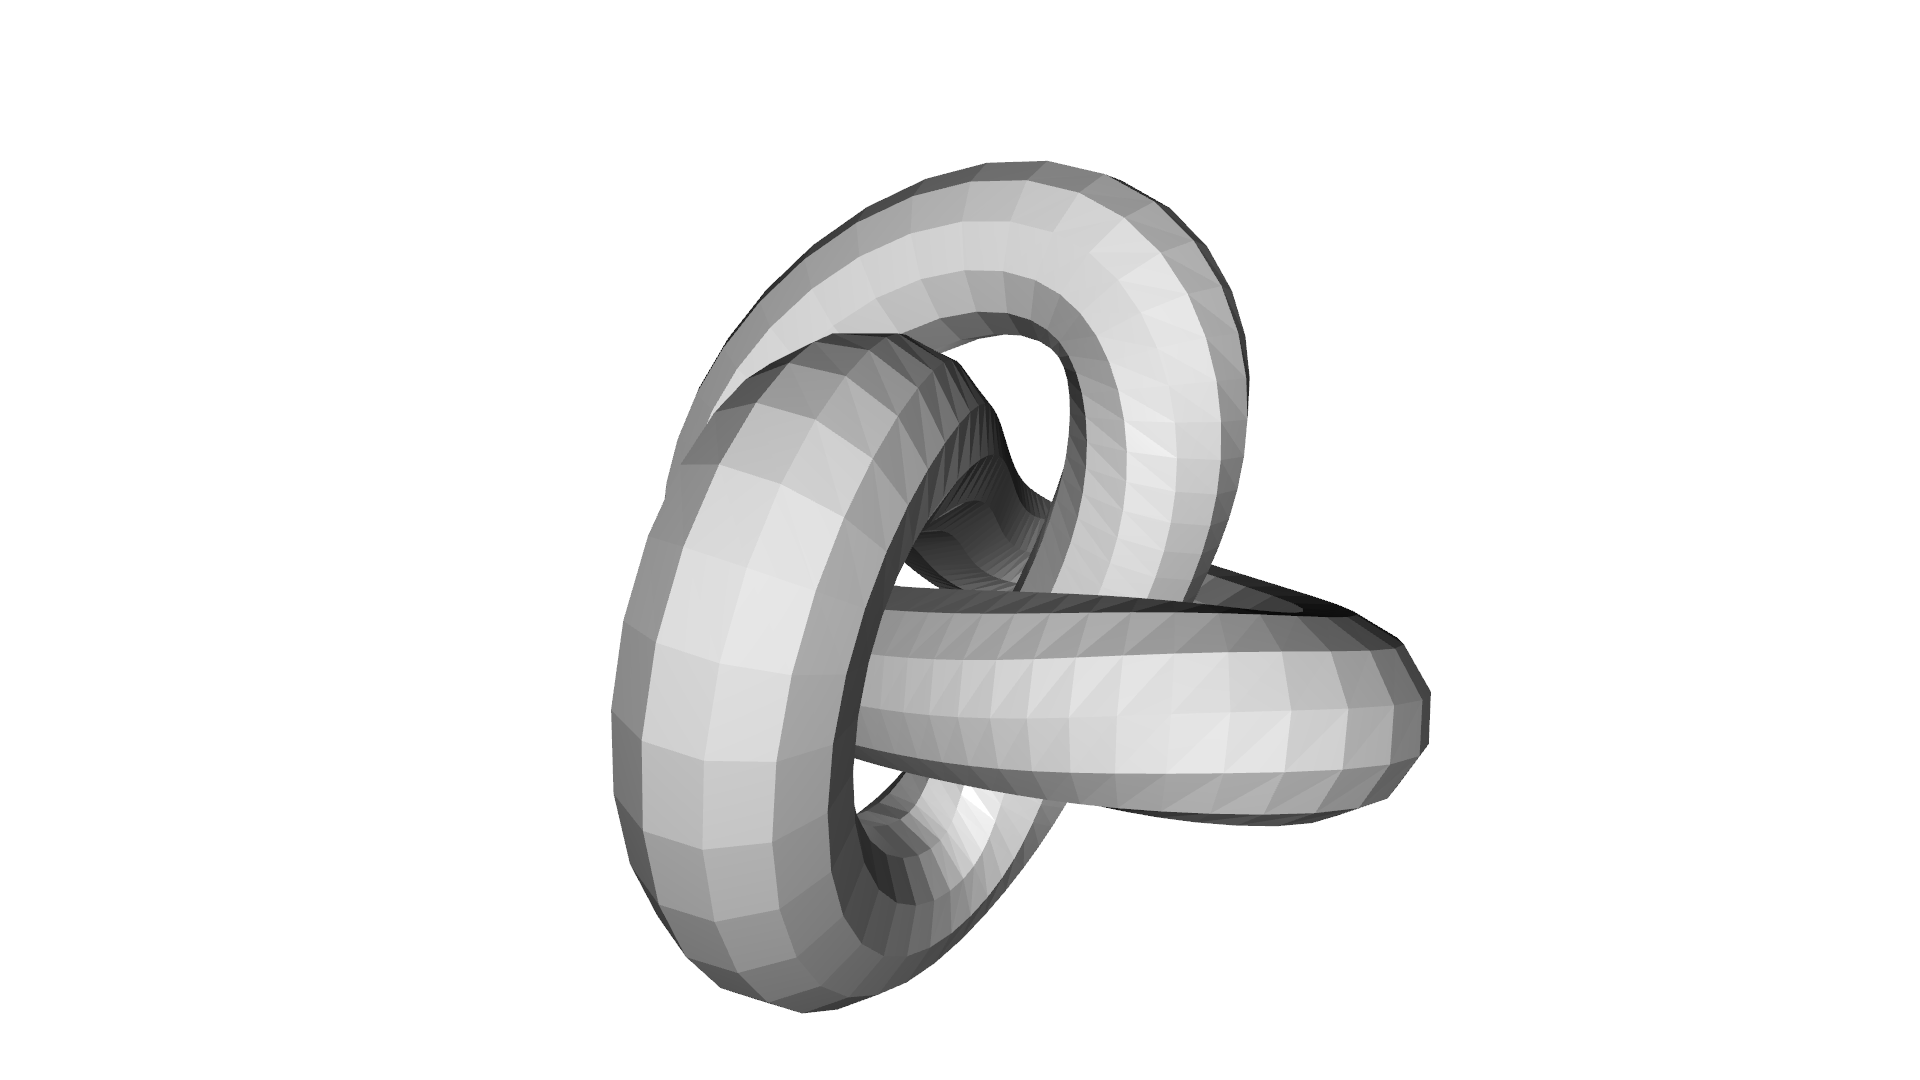

A mesh with no normals and no colors does not look good.


In [3]:
print("Try to render a mesh with normals (exist: " +
        str(mesh.has_vertex_normals()) + ") and colors (exist: " +
        str(mesh.has_vertex_colors()) + ")")
o3d.visualization.draw_geometries([mesh])
print("A mesh with no normals and no colors does not look good.")

Computing normal and rendering it.
[[ 0.79164373 -0.53951444  0.28674793]
 [ 0.8319824  -0.53303008  0.15389681]
 [ 0.83488162 -0.09250101  0.54260136]
 ...
 [ 0.16269924 -0.76215917 -0.6266118 ]
 [ 0.52755226 -0.83707495 -0.14489352]
 [ 0.56778973 -0.76467734 -0.30476777]]


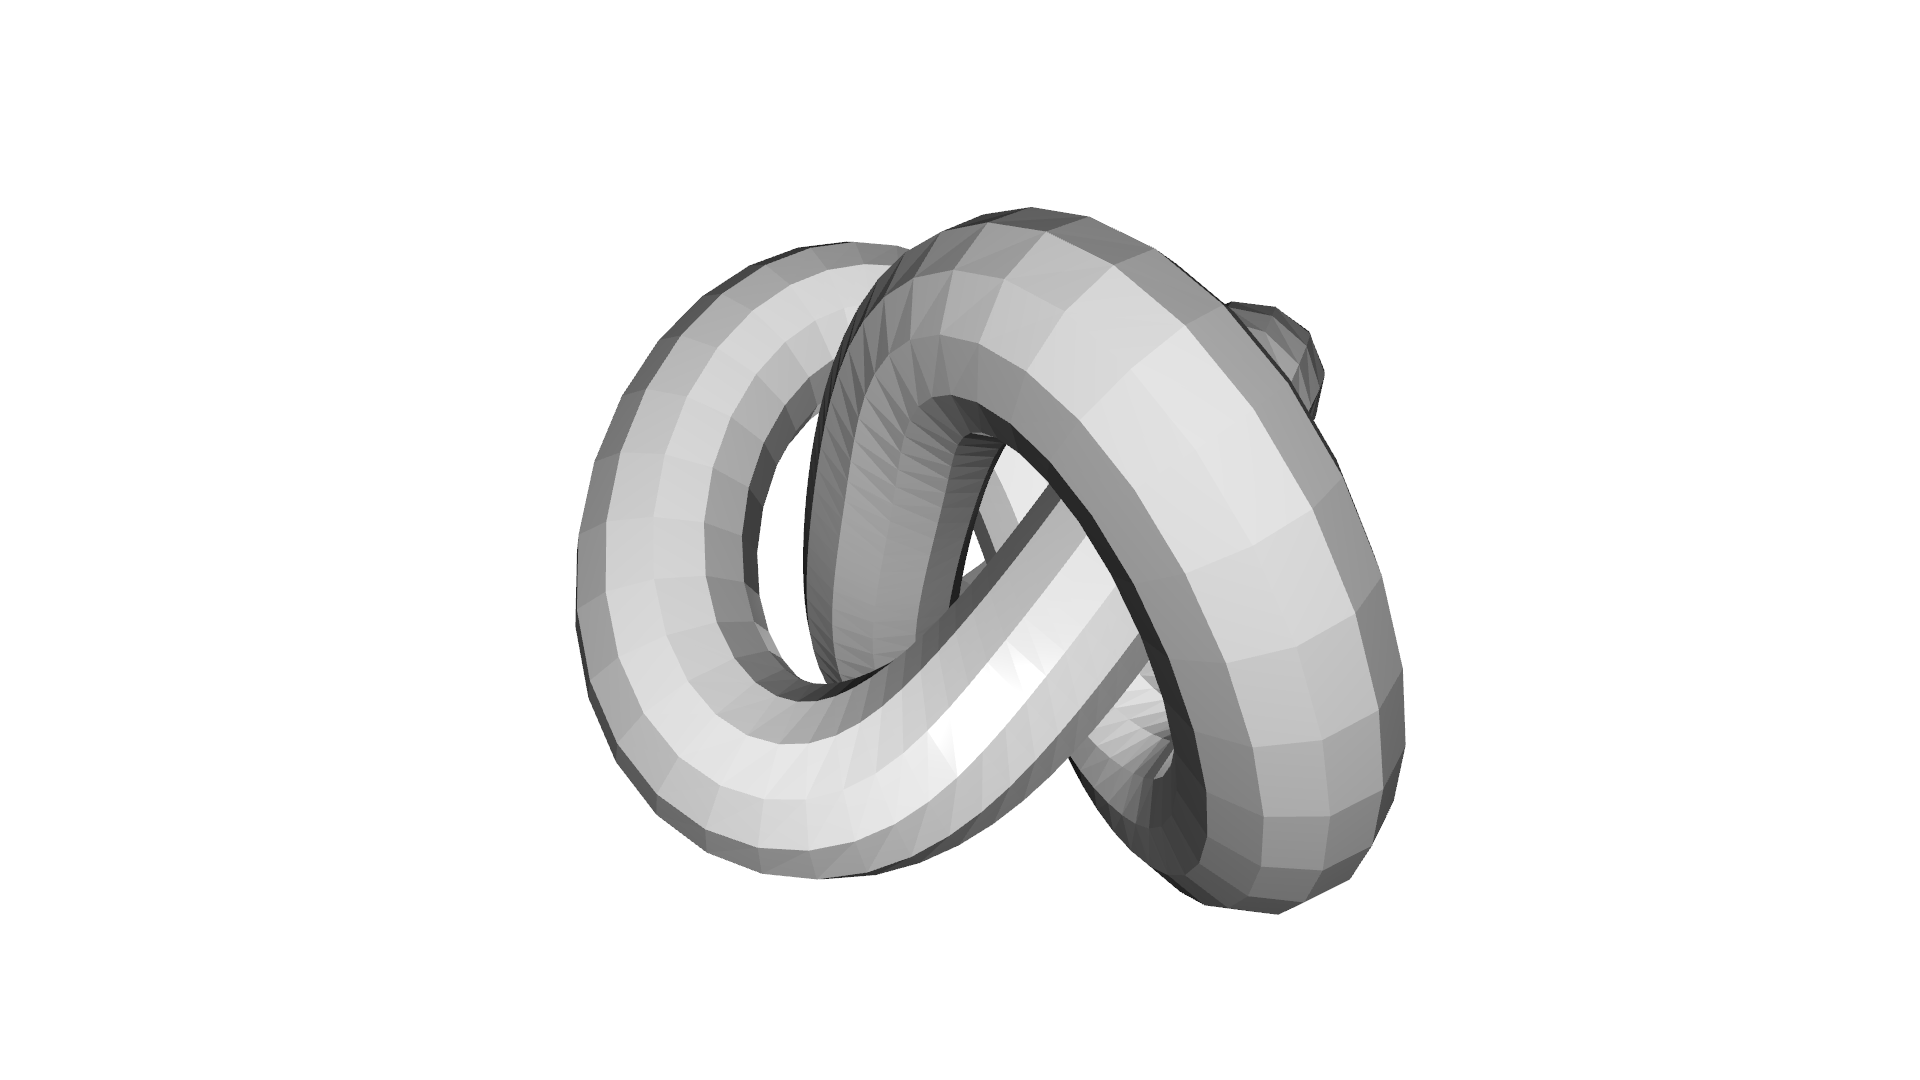

In [4]:

print("Computing normal and rendering it.")
mesh.compute_vertex_normals()
print(np.asarray(mesh.triangle_normals))
o3d.visualization.draw_geometries([mesh])

We make a partial mesh of only the first half triangles.
std::vector<Eigen::Vector3i> with 1440 elements.
Use numpy.asarray() to access data.


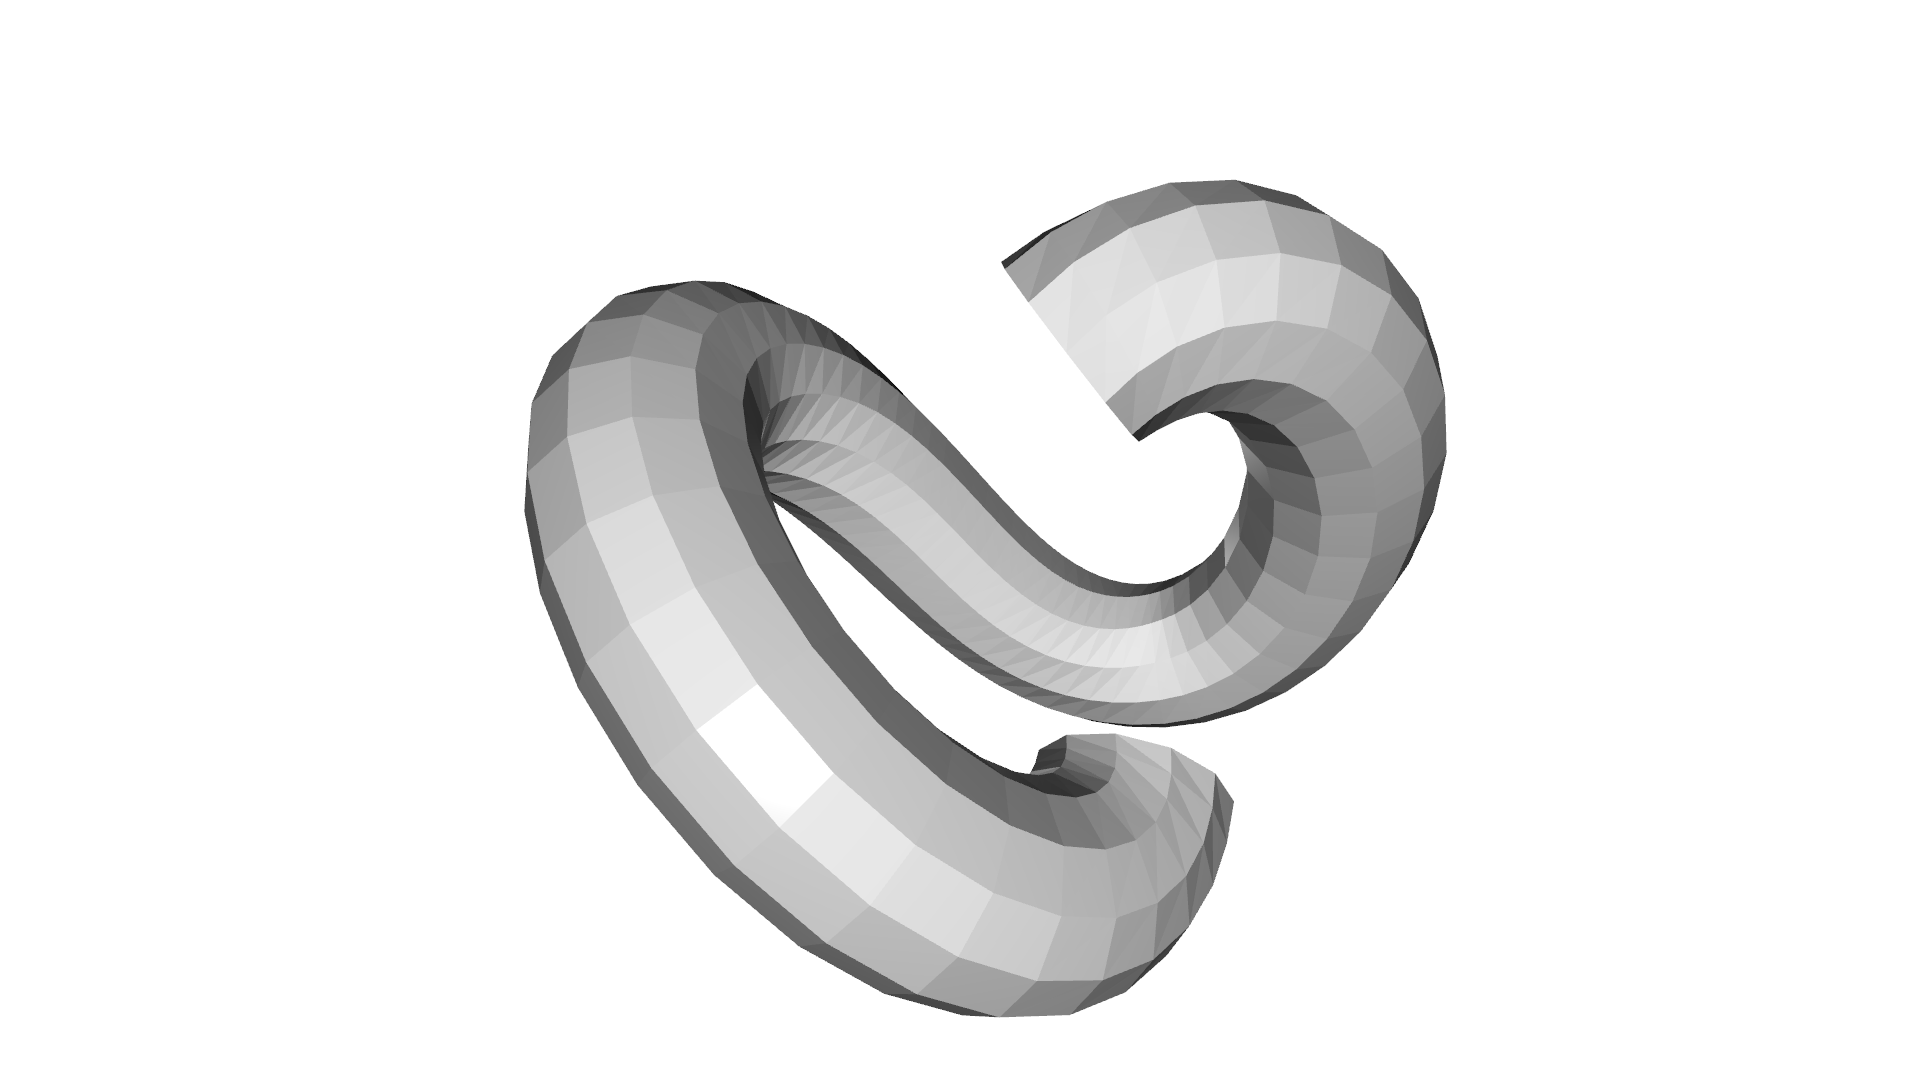

In [8]:

print("We make a partial mesh of only the first half triangles.")
mesh1 = copy.deepcopy(mesh)
mesh1.triangles = o3d.utility.Vector3iVector(
        np.asarray(mesh1.triangles)[:len(mesh1.triangles) // 2, :])
mesh1.triangle_normals = o3d.utility.Vector3dVector(
    np.asarray(mesh1.triangle_normals)[:len(mesh1.triangle_normals) // 2, :])
print(mesh1.triangles)
o3d.visualization.draw_geometries([mesh1])

Painting the mesh


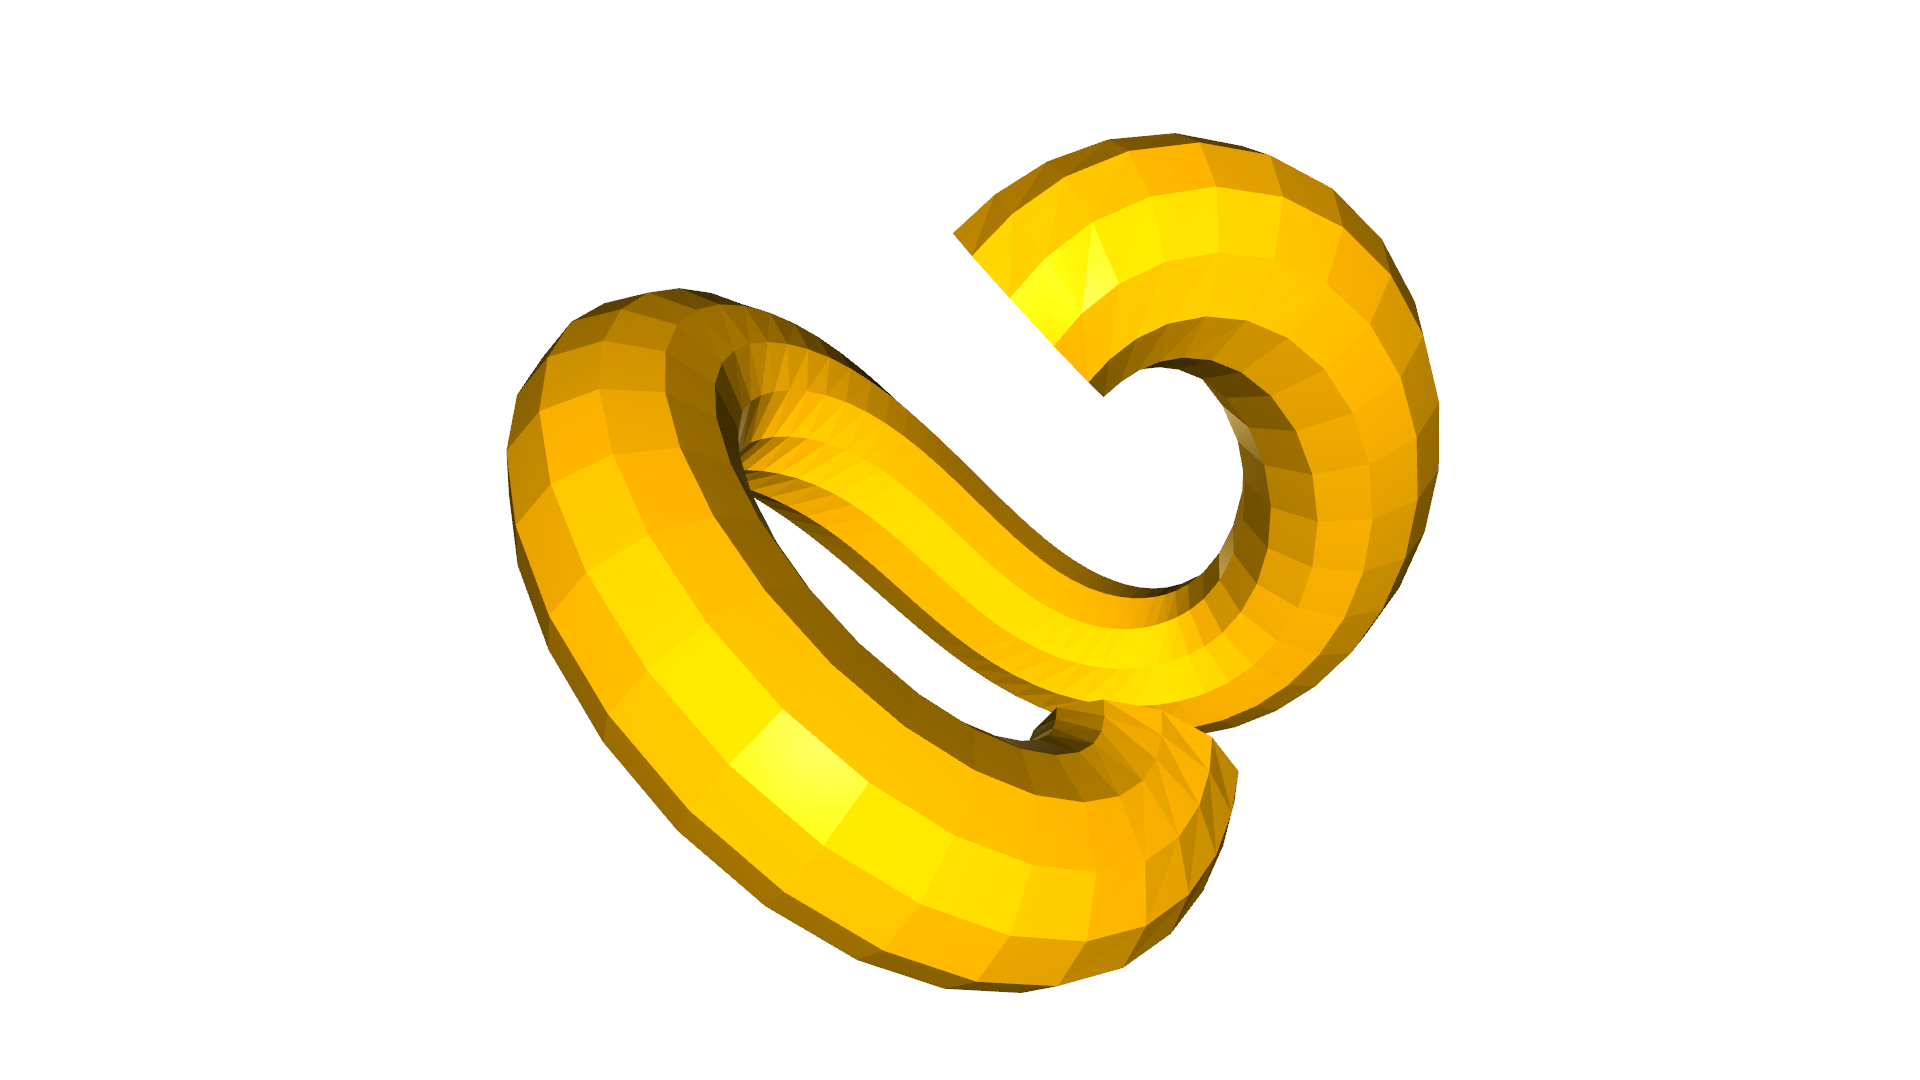

In [9]:
print("Painting the mesh")
mesh1.paint_uniform_color([1, 0.706, 0])
o3d.visualization.draw_geometries([mesh1])

In [7]:
def check_properties(name, mesh):
    mesh.compute_vertex_normals()

    edge_manifold = mesh.is_edge_manifold(allow_boundary_edges=True)
    edge_manifold_boundary = mesh.is_edge_manifold(allow_boundary_edges=False)
    vertex_manifold = mesh.is_vertex_manifold()
    self_intersecting = mesh.is_self_intersecting()
    watertight = mesh.is_watertight()
    orientable = mesh.is_orientable()

    print(name)
    print(f"  edge_manifold:          {edge_manifold}")
    print(f"  edge_manifold_boundary: {edge_manifold_boundary}")
    print(f"  vertex_manifold:        {vertex_manifold}")
    print(f"  self_intersecting:      {self_intersecting}")
    print(f"  watertight:             {watertight}")
    print(f"  orientable:             {orientable}")

    geoms = [mesh]
    if not edge_manifold:
        edges = mesh.get_non_manifold_edges(allow_boundary_edges=True)
        geoms.append(o3dtut.edges_to_lineset(mesh, edges, (1, 0, 0)))
    if not edge_manifold_boundary:
        edges = mesh.get_non_manifold_edges(allow_boundary_edges=False)
        geoms.append(o3dtut.edges_to_lineset(mesh, edges, (0, 1, 0)))
    if not vertex_manifold:
        verts = np.asarray(mesh.get_non_manifold_vertices())
        pcl = o3d.geometry.PointCloud(
            points=o3d.utility.Vector3dVector(np.asarray(mesh.vertices)[verts]))
        pcl.paint_uniform_color((0, 0, 1))
        geoms.append(pcl)
    if self_intersecting:
        intersecting_triangles = np.asarray(
            mesh.get_self_intersecting_triangles())
        intersecting_triangles = intersecting_triangles[0:1]
        intersecting_triangles = np.unique(intersecting_triangles)
        print("  # visualize self-intersecting triangles")
        triangles = np.asarray(mesh.triangles)[intersecting_triangles]
        edges = [
            np.vstack((triangles[:, i], triangles[:, j]))
            for i, j in [(0, 1), (1, 2), (2, 0)]
        ]
        edges = np.hstack(edges).T
        edges = o3d.utility.Vector2iVector(edges)
        geoms.append(o3dtut.edges_to_lineset(mesh, edges, (1, 0, 1)))
    o3d.visualization.draw_geometries(geoms, mesh_show_back_face=True)

Knot
  edge_manifold:          True
  edge_manifold_boundary: True
  vertex_manifold:        True
  self_intersecting:      False
  watertight:             True
  orientable:             True


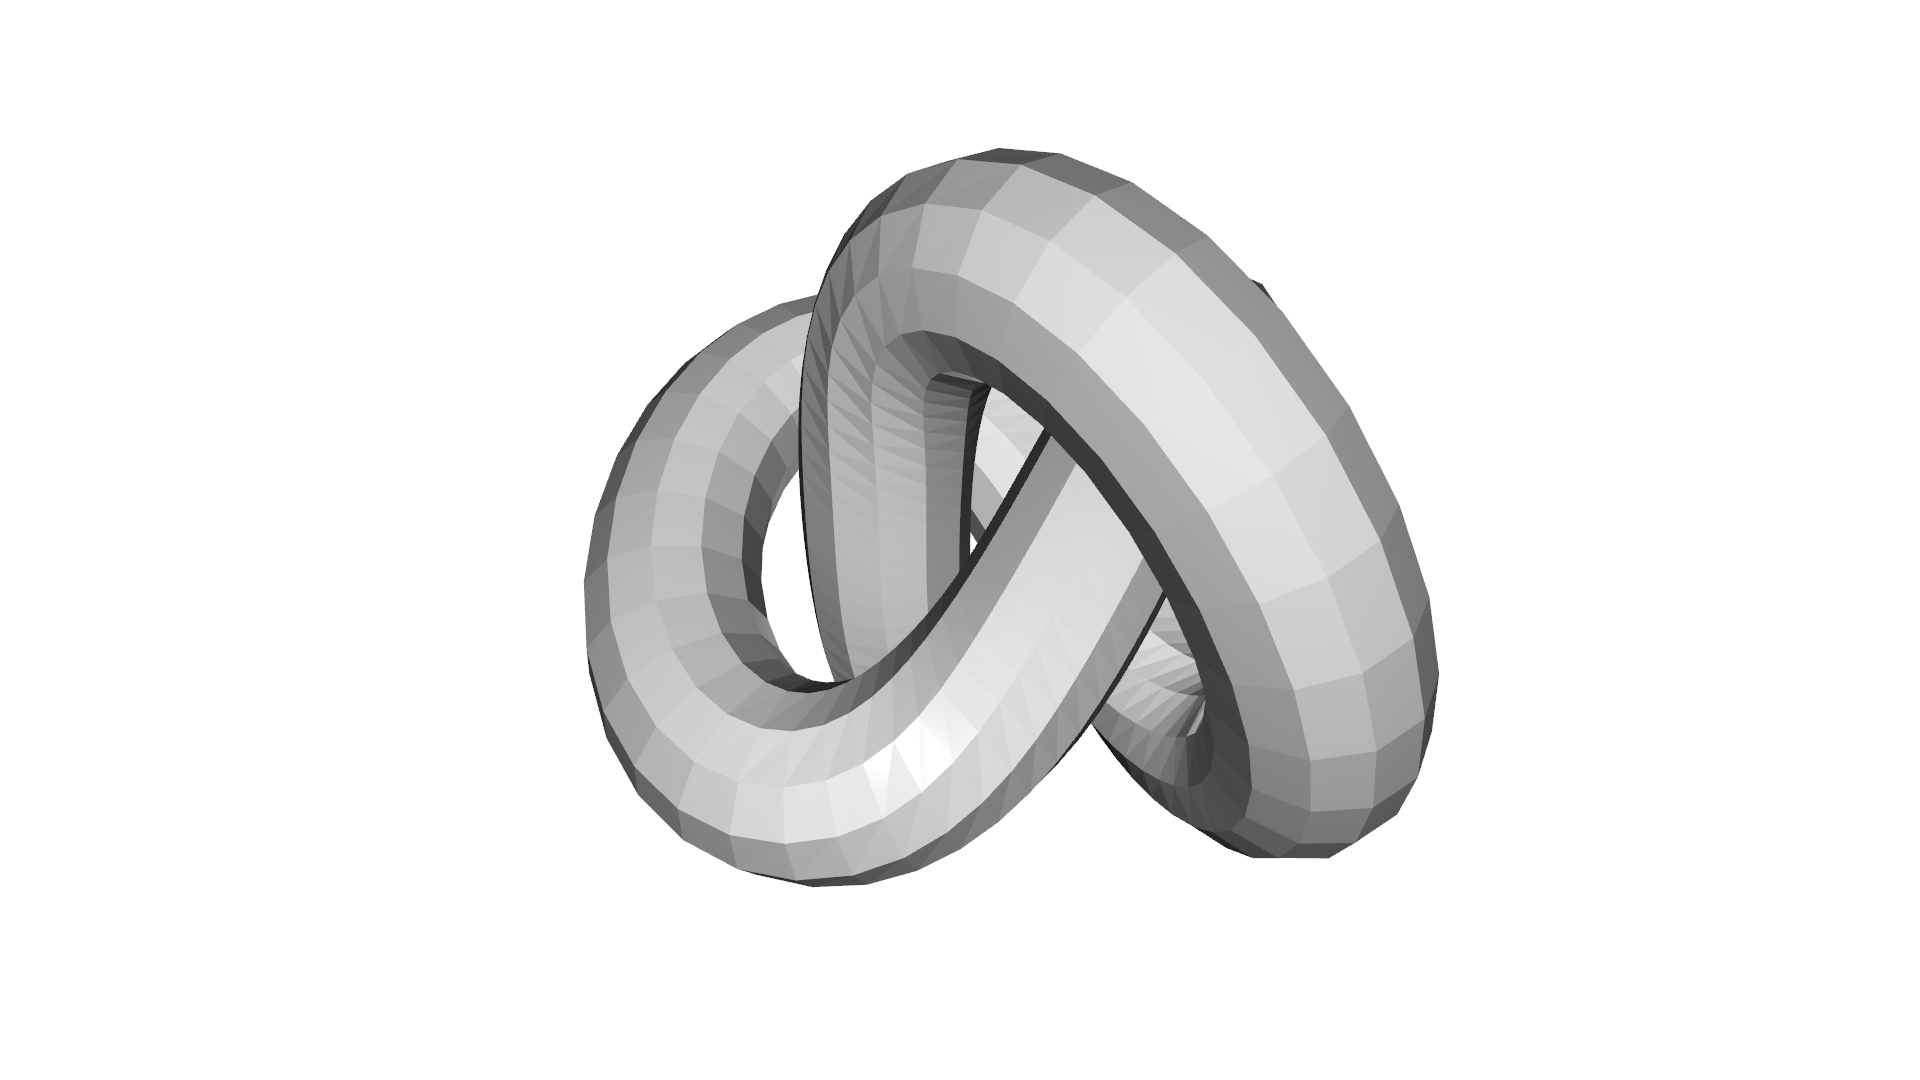

Moebius
  edge_manifold:          True
  edge_manifold_boundary: False
  vertex_manifold:        True
  self_intersecting:      False
  watertight:             False
  orientable:             False


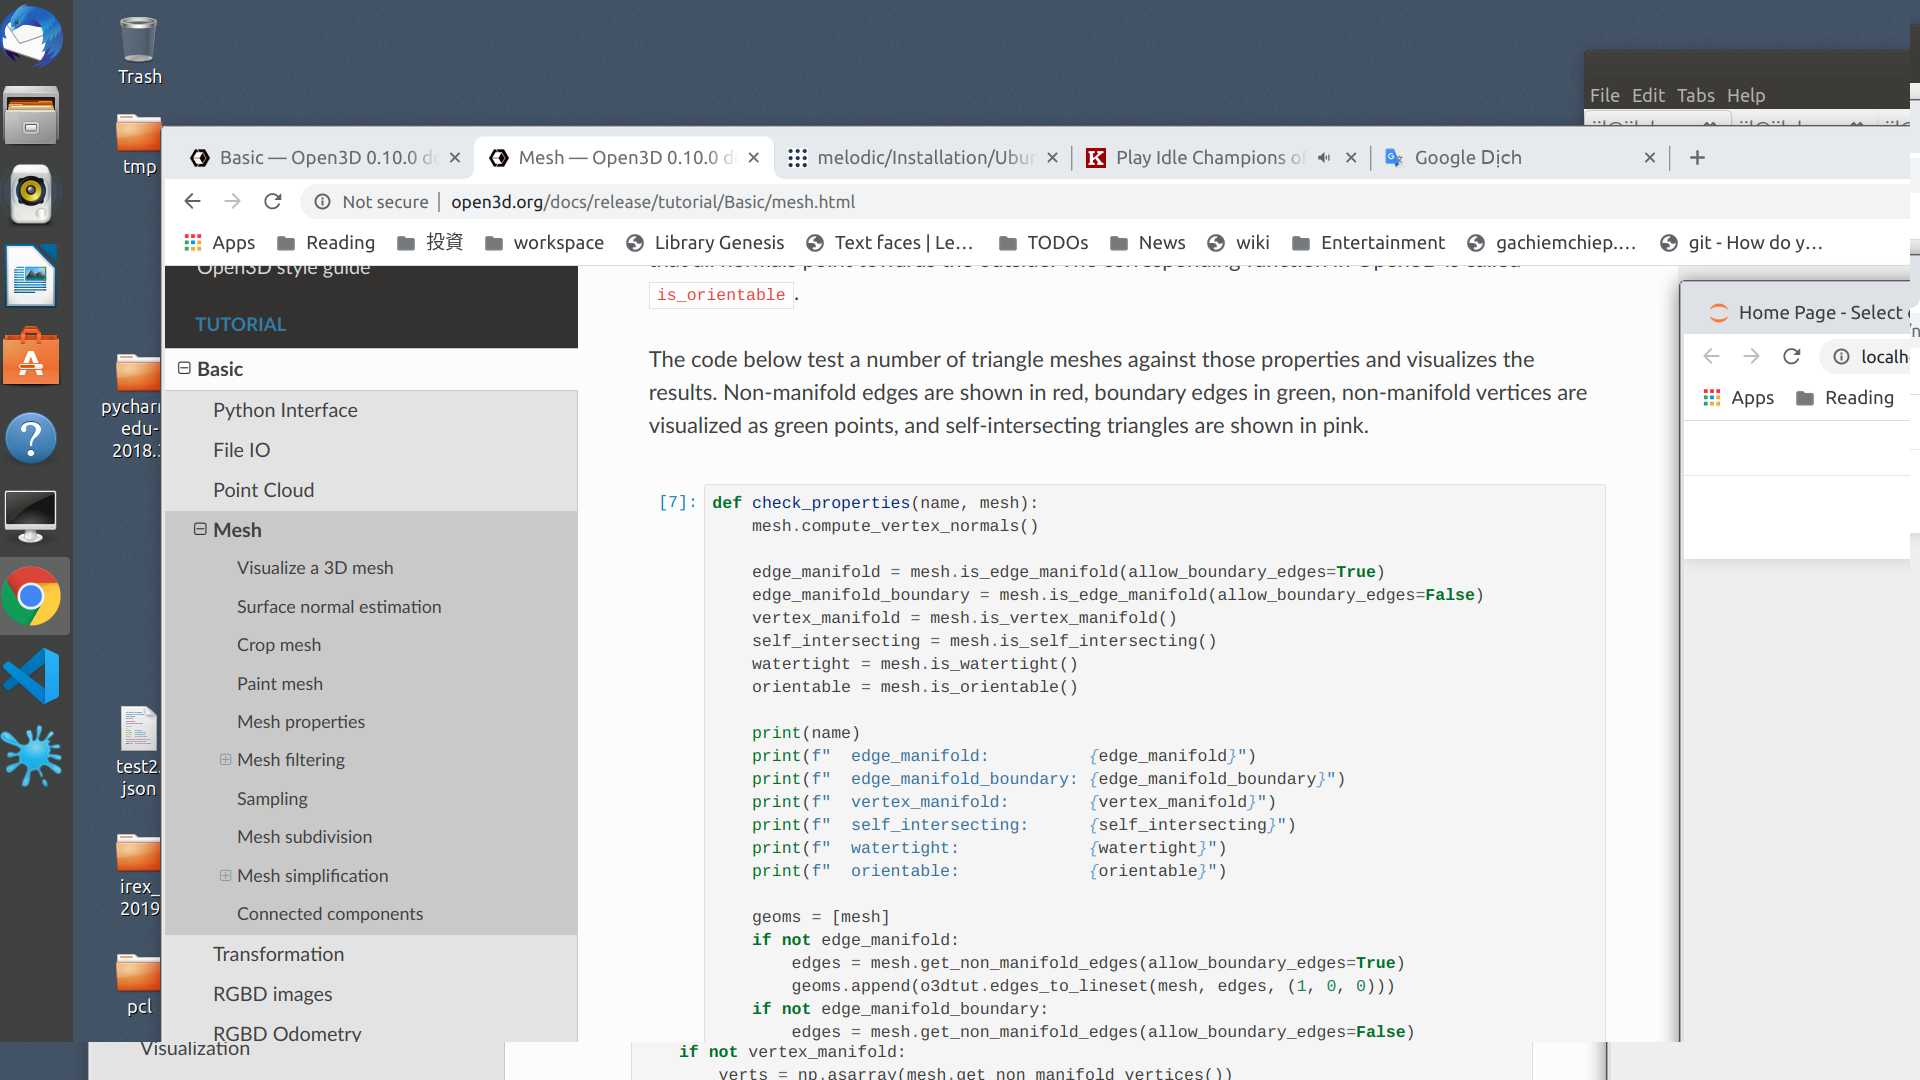

non-manifold edge
  edge_manifold:          False
  edge_manifold_boundary: False
  vertex_manifold:        True
  self_intersecting:      False
  watertight:             False
  orientable:             True


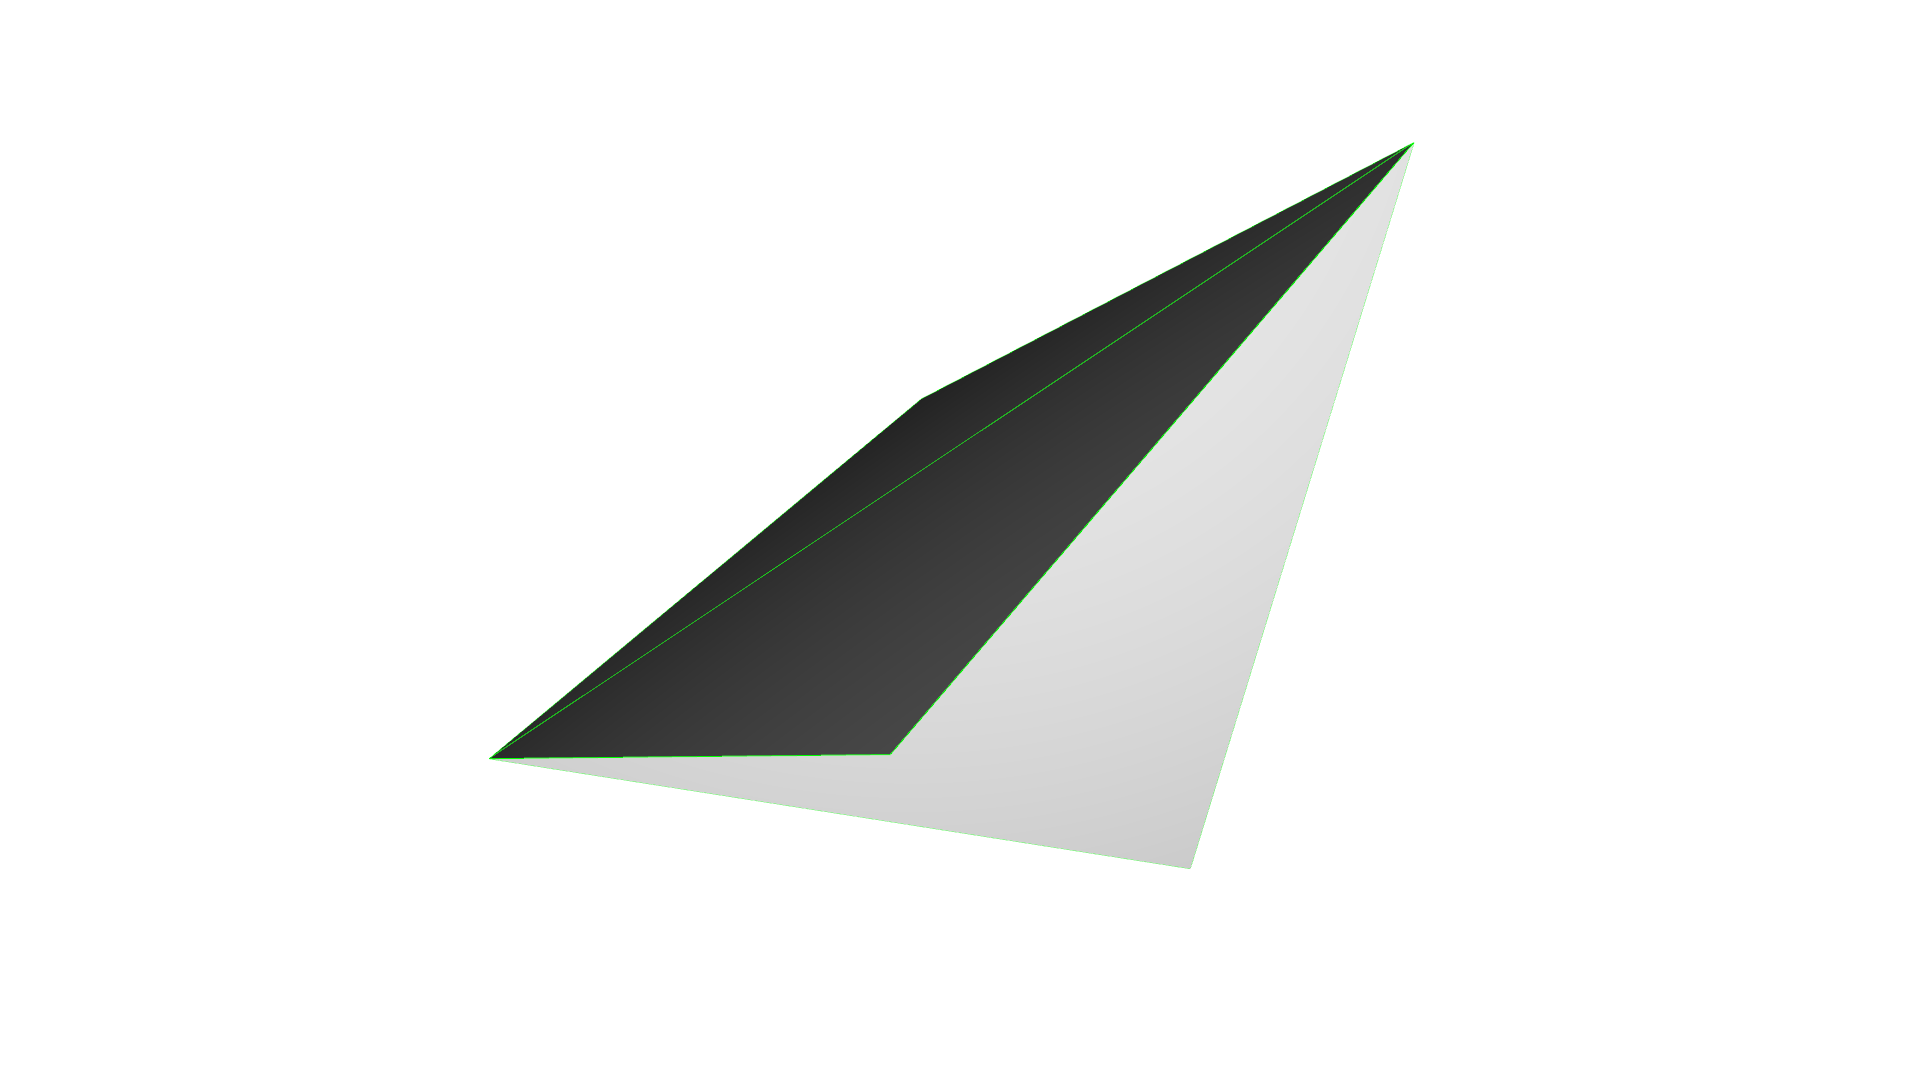

non-manifold vertex
  edge_manifold:          True
  edge_manifold_boundary: True
  vertex_manifold:        False
  self_intersecting:      False
  watertight:             False
  orientable:             True


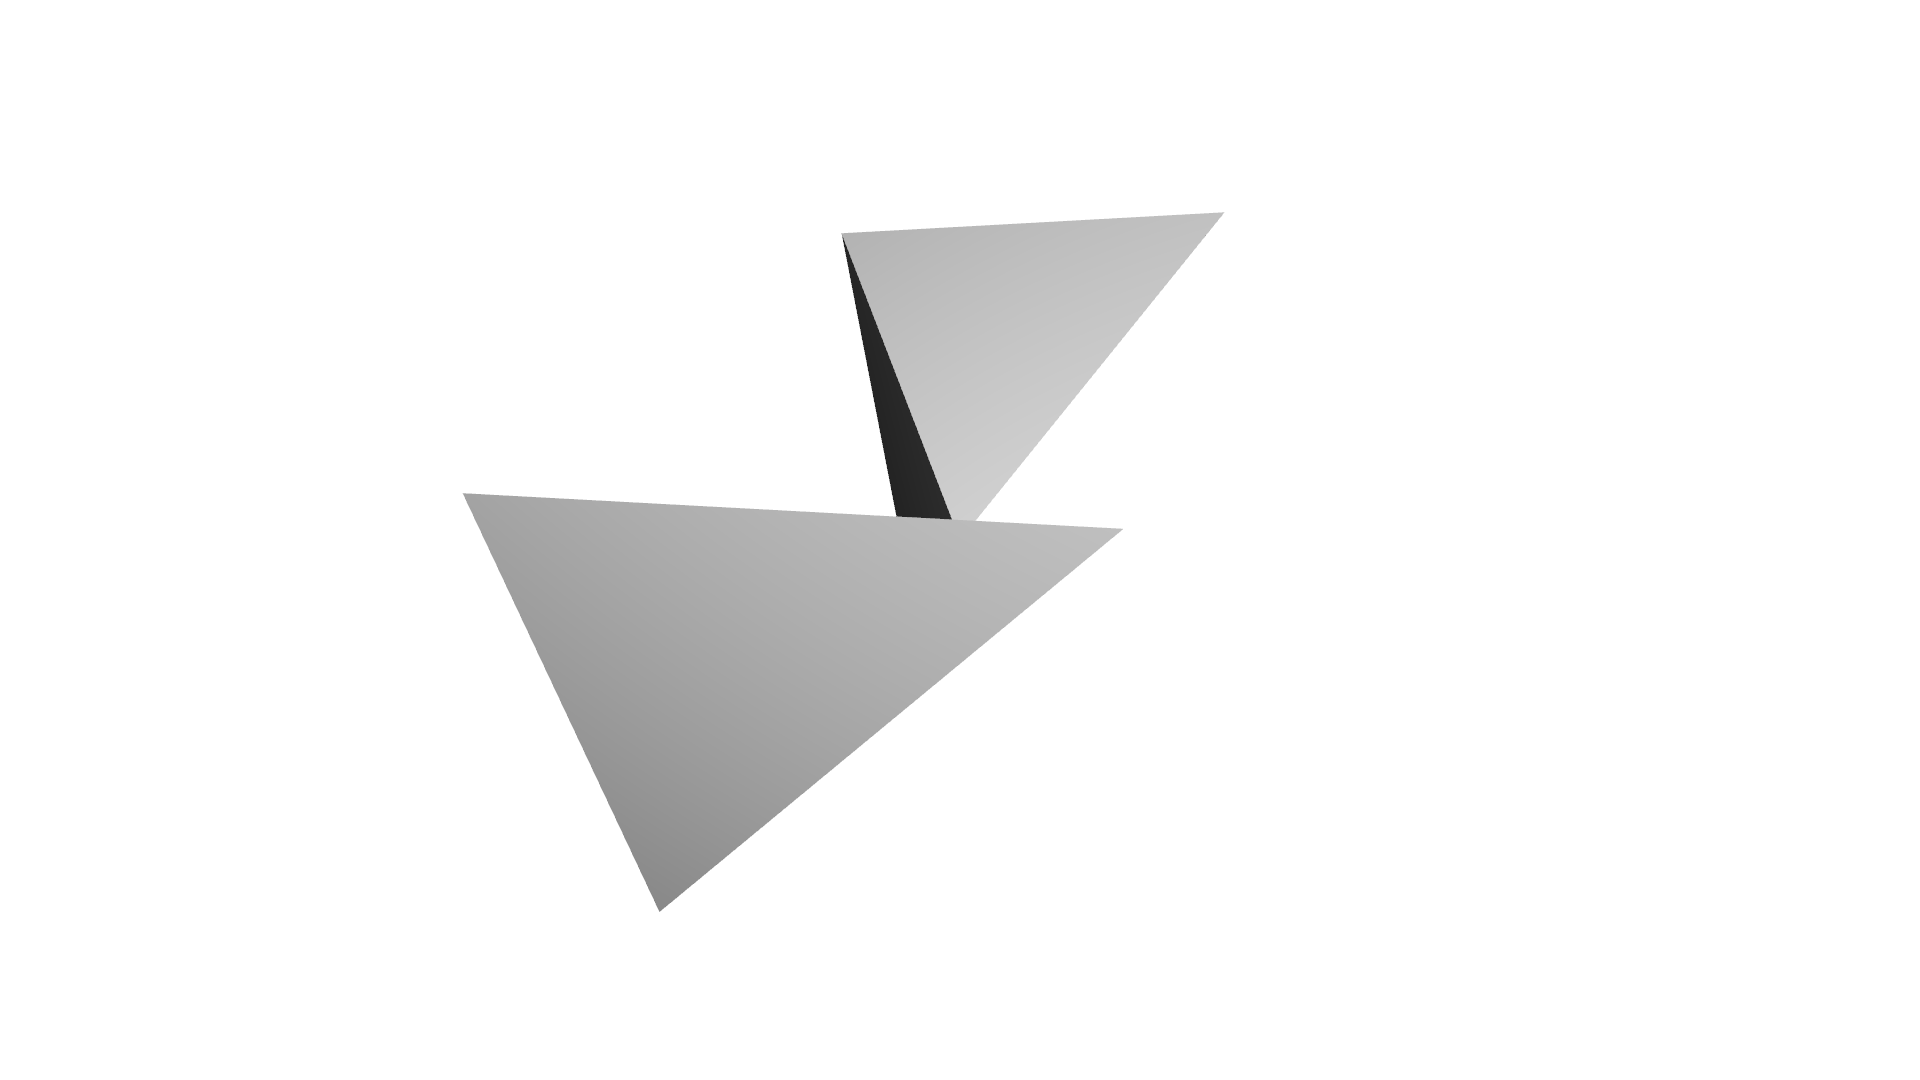

open box
  edge_manifold:          True
  edge_manifold_boundary: False
  vertex_manifold:        True
  self_intersecting:      False
  watertight:             False
  orientable:             True


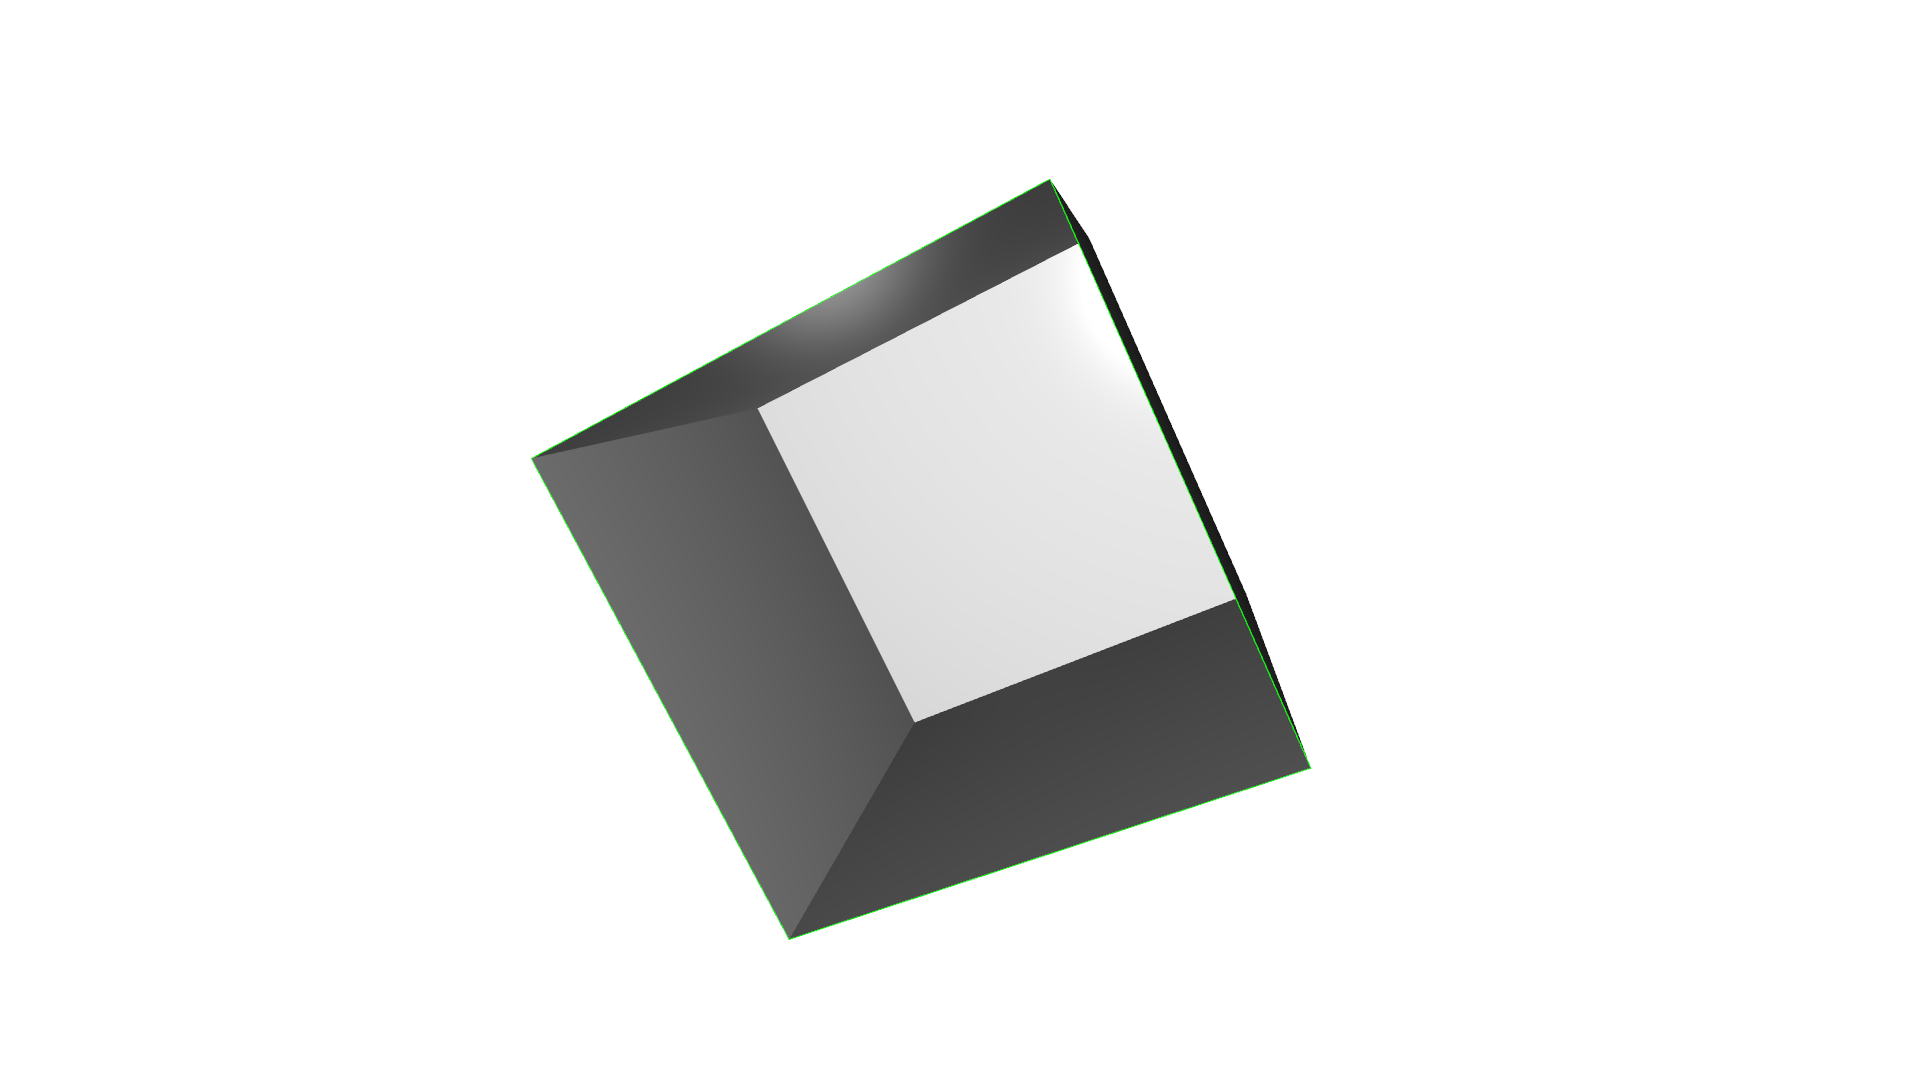

intersecting_boxes
  edge_manifold:          True
  edge_manifold_boundary: True
  vertex_manifold:        True
  self_intersecting:      True
  watertight:             False
  orientable:             True
  # visualize self-intersecting triangles


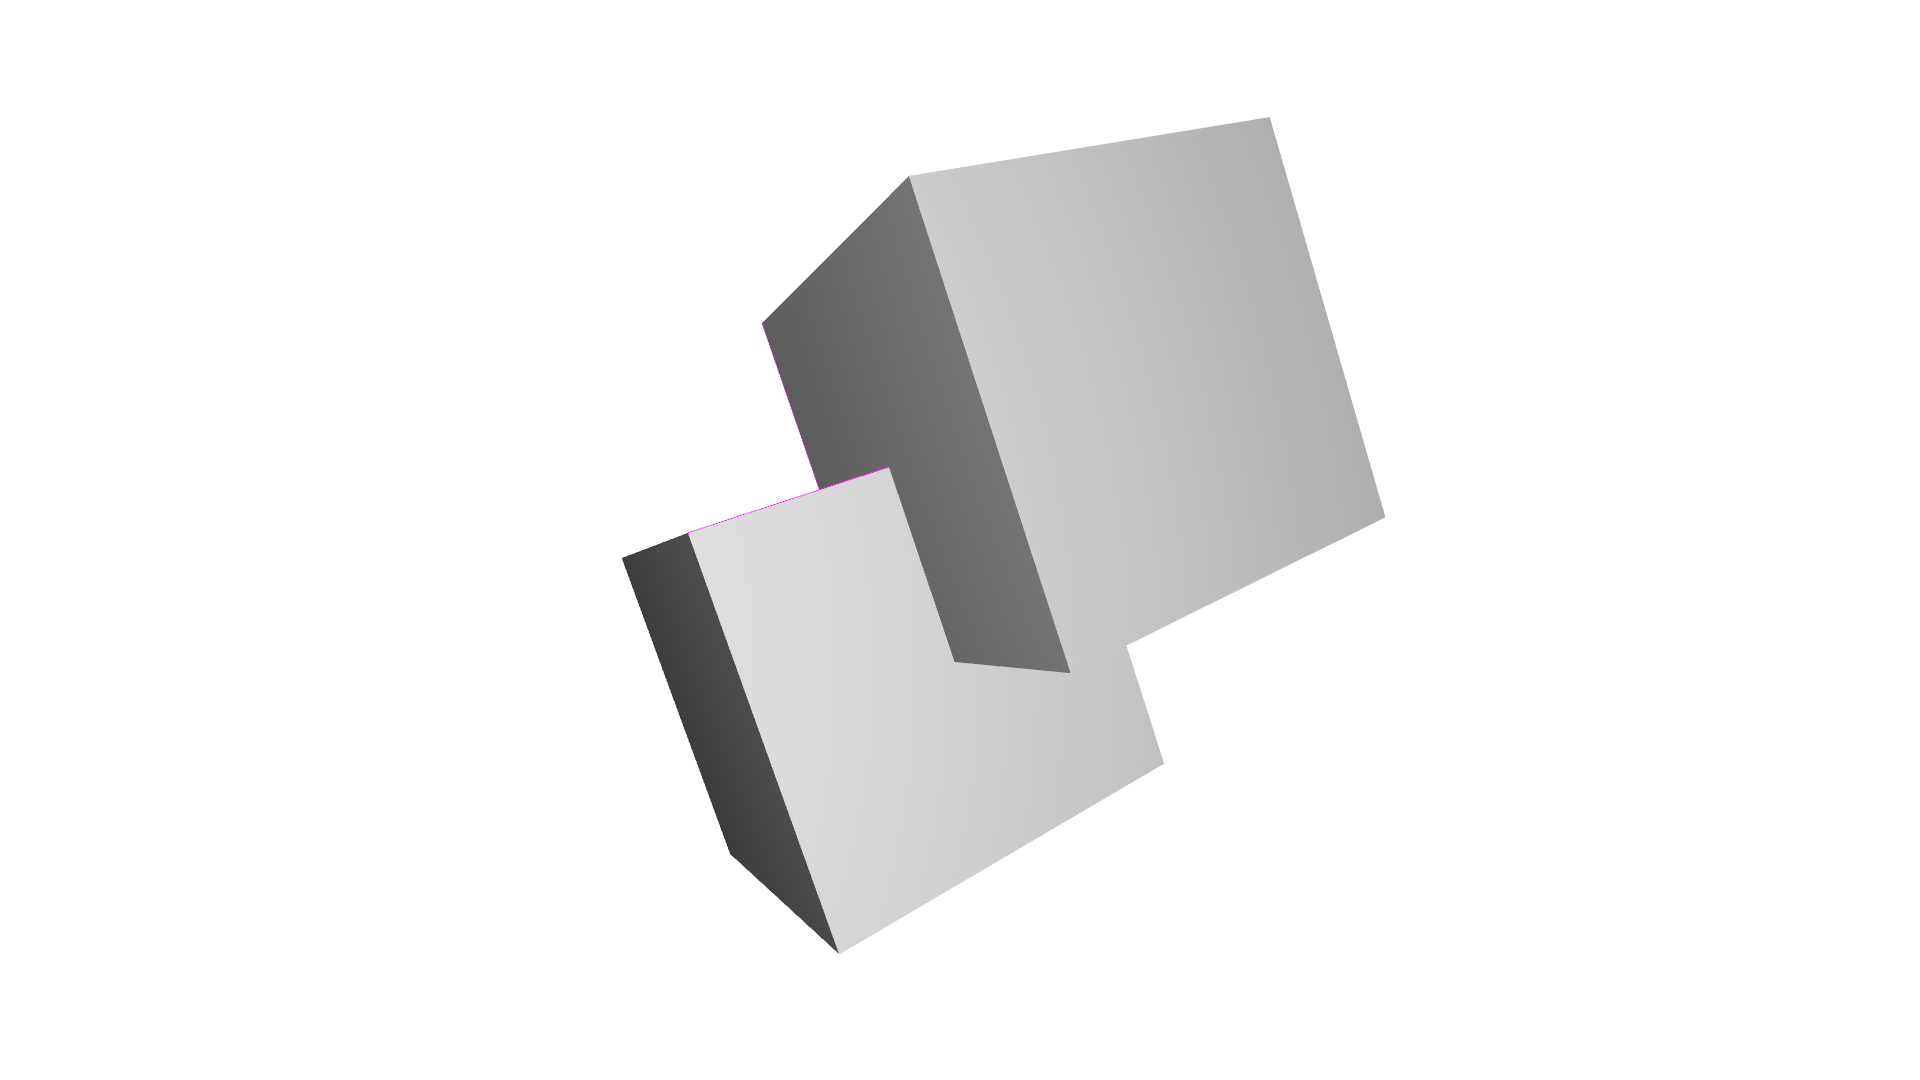

In [8]:
check_properties('Knot', o3dtut.get_knot_mesh())
check_properties('Moebius', o3d.geometry.TriangleMesh.create_moebius(twists=1))
check_properties("non-manifold edge", o3dtut.get_non_manifold_edge_mesh())
check_properties("non-manifold vertex", o3dtut.get_non_manifold_vertex_mesh())
check_properties("open box", o3dtut.get_open_box_mesh())
check_properties("intersecting_boxes", o3dtut.get_intersecting_boxes_mesh())

create noisy mesh


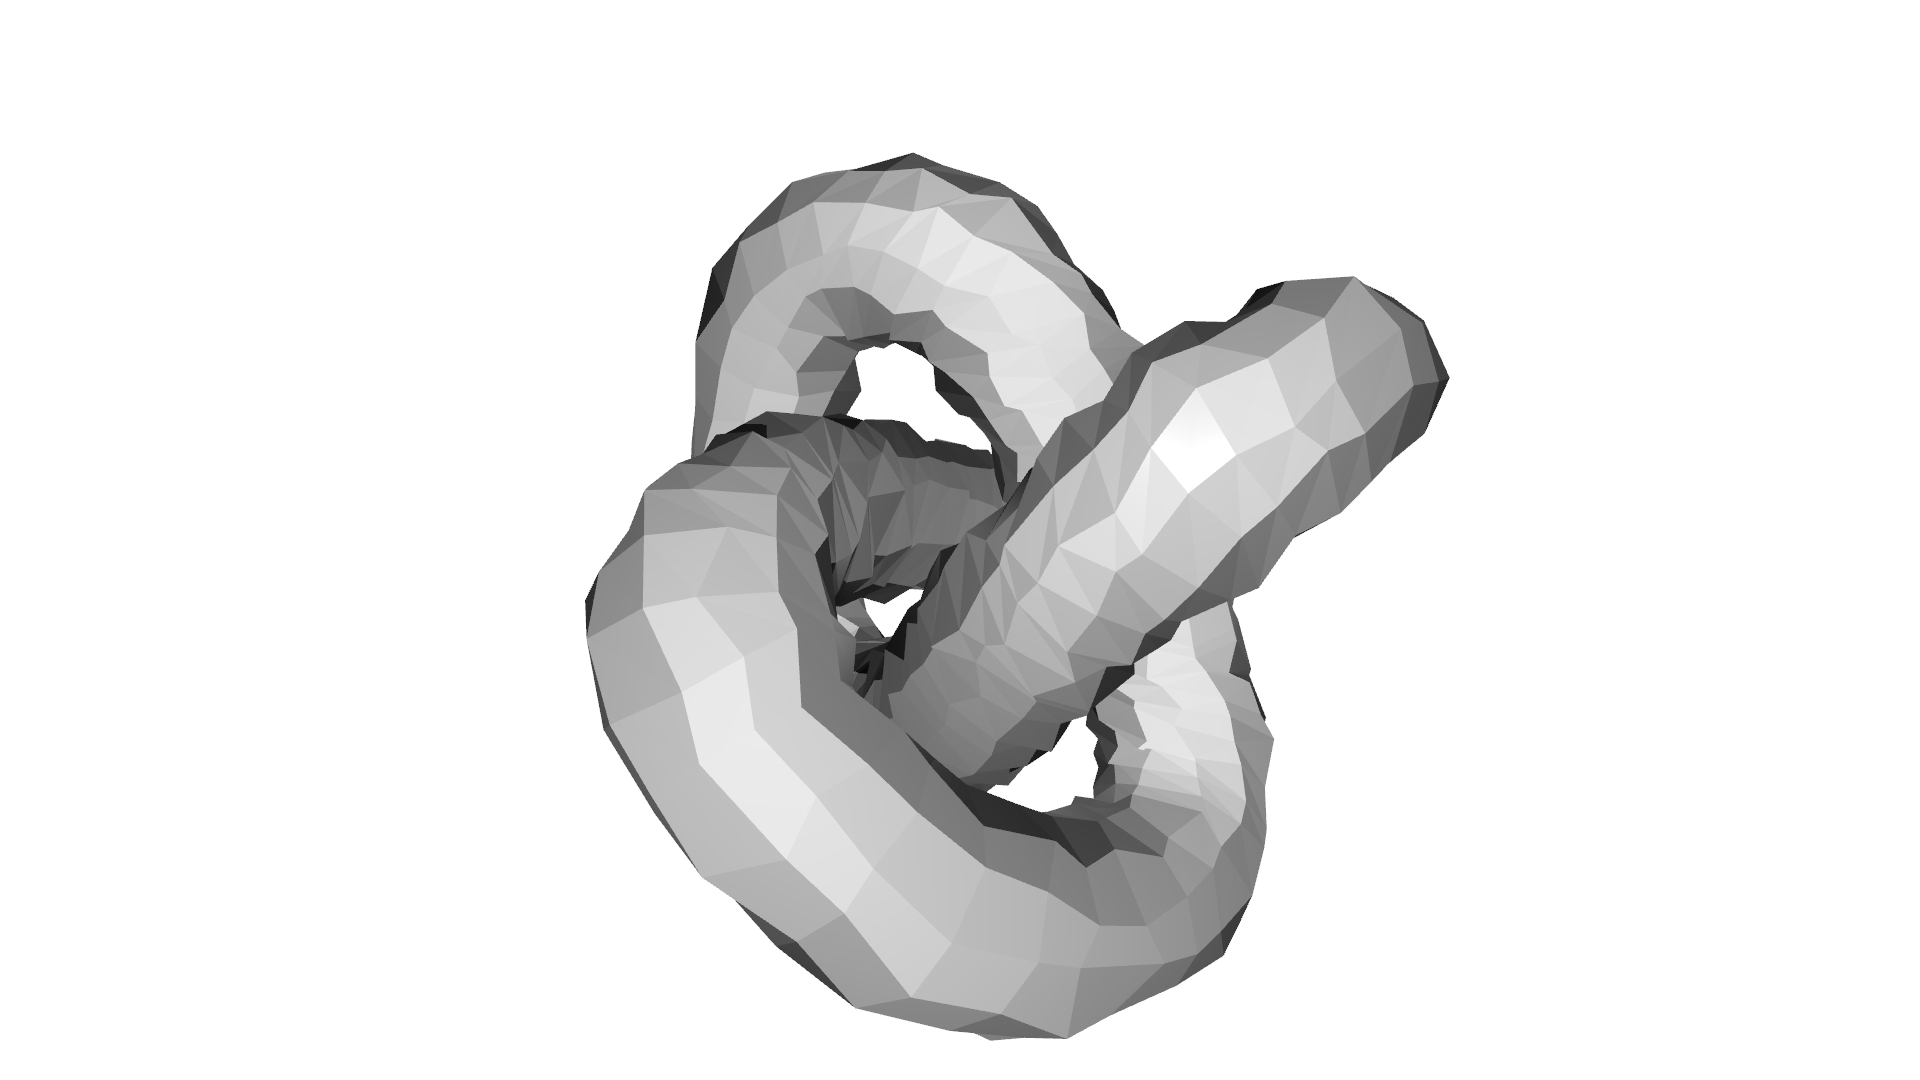

filter with average with 1 iteration


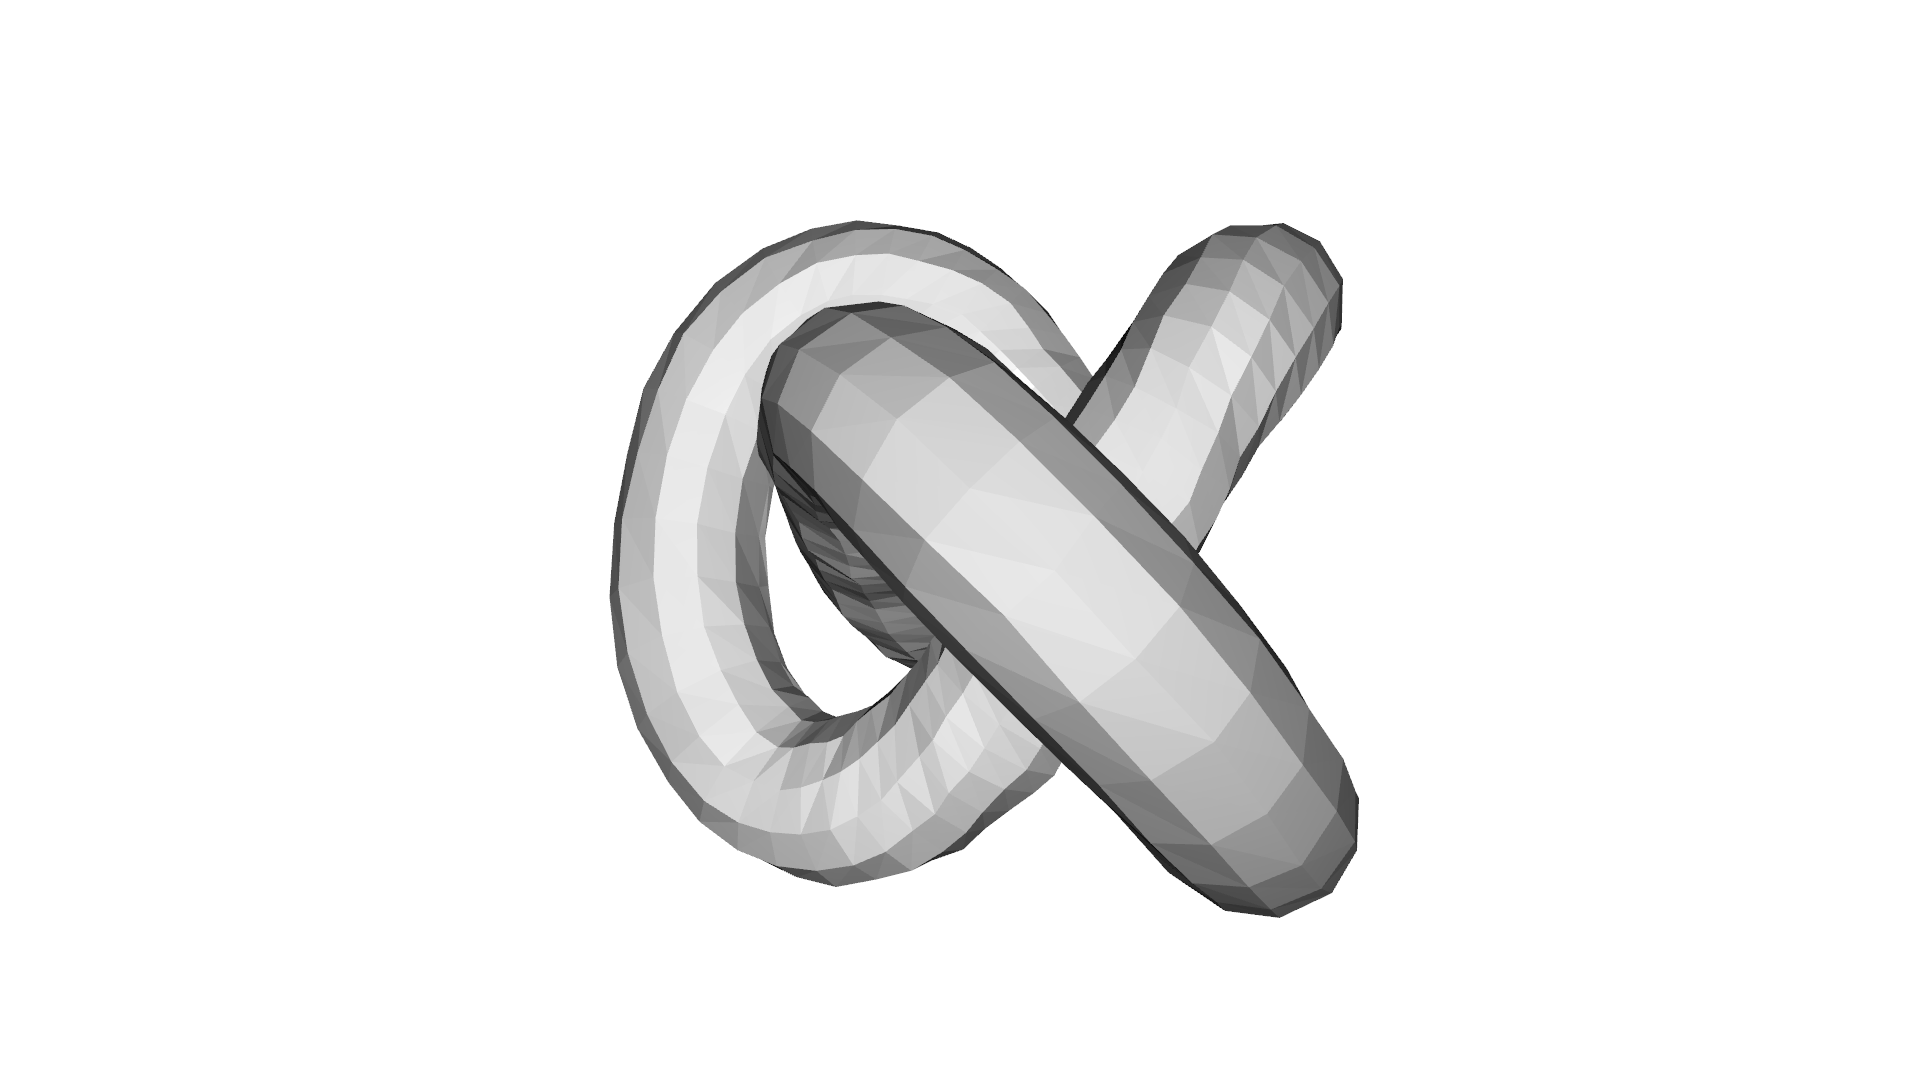

filter with average with 5 iterations


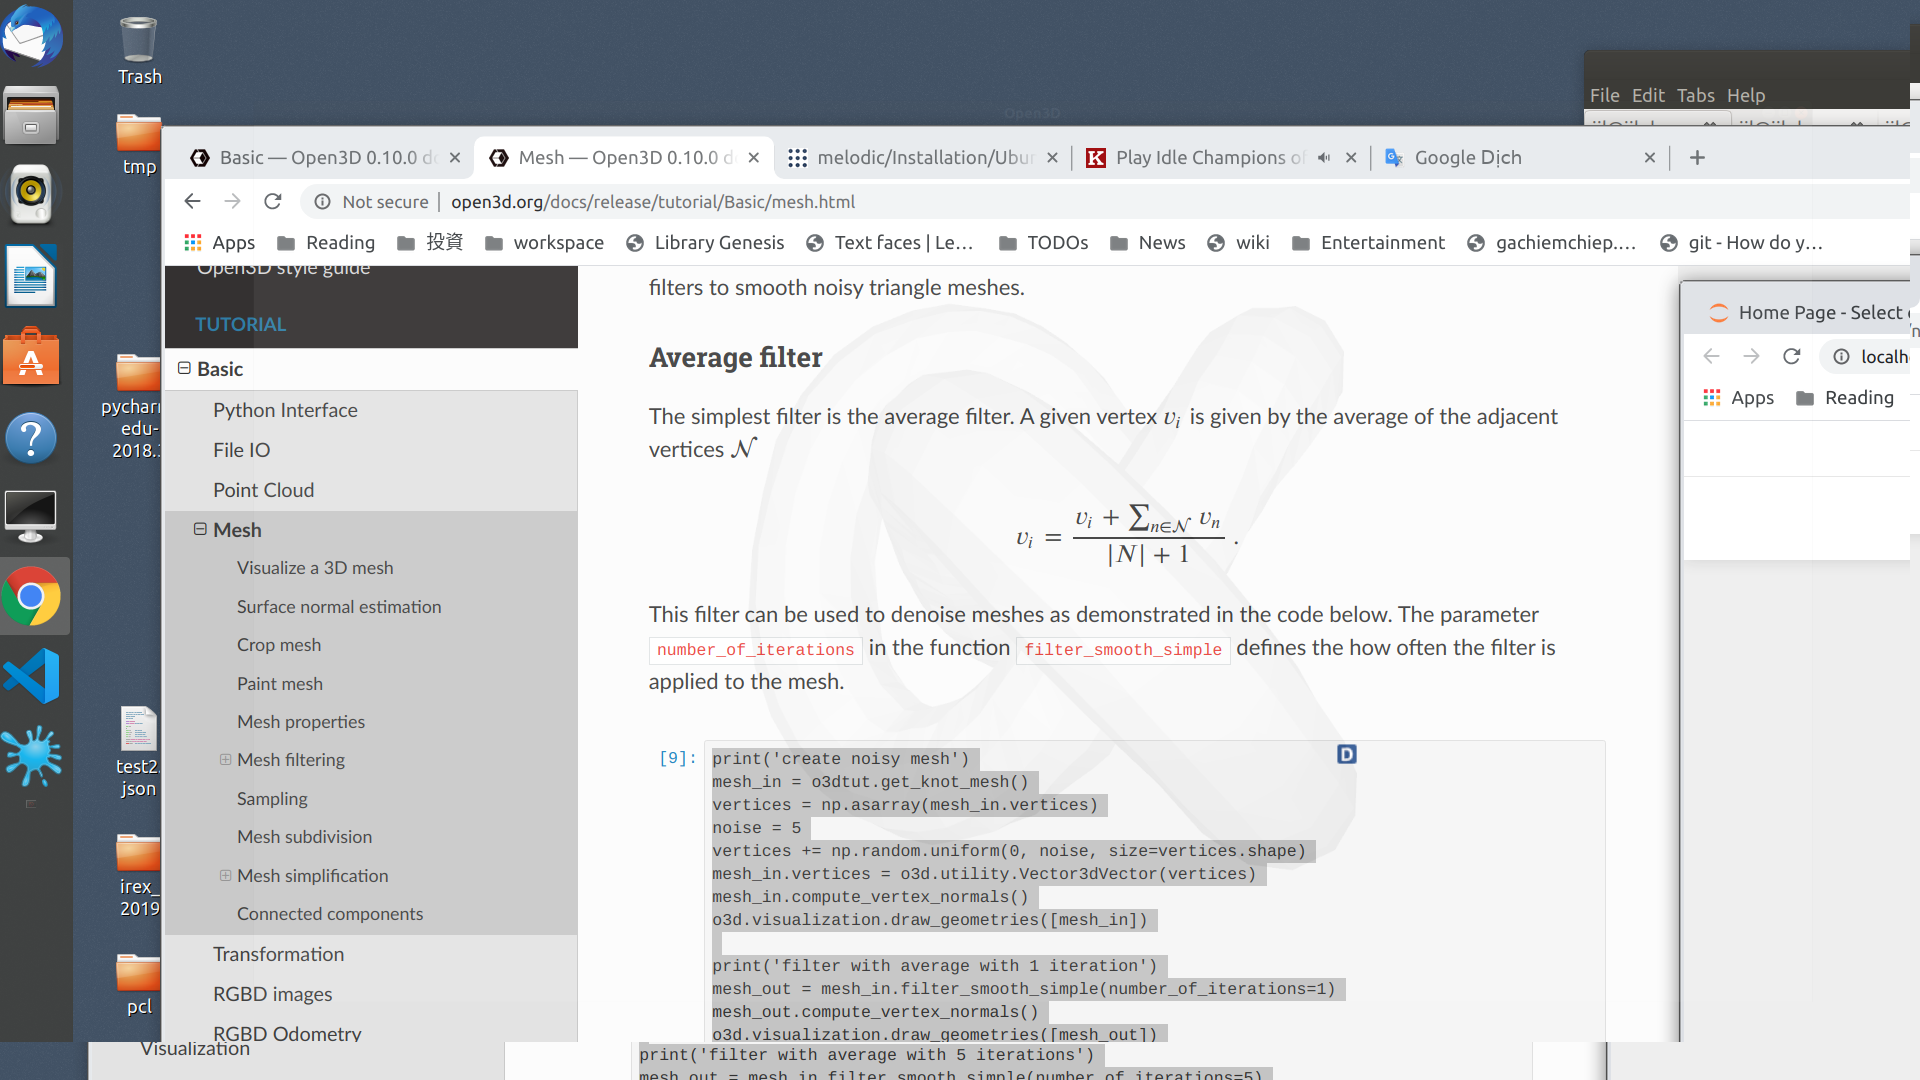

In [9]:

print('create noisy mesh')
mesh_in = o3dtut.get_knot_mesh()
vertices = np.asarray(mesh_in.vertices)
noise = 5
vertices += np.random.uniform(0, noise, size=vertices.shape)
mesh_in.vertices = o3d.utility.Vector3dVector(vertices)
mesh_in.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_in])

print('filter with average with 1 iteration')
mesh_out = mesh_in.filter_smooth_simple(number_of_iterations=1)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

print('filter with average with 5 iterations')
mesh_out = mesh_in.filter_smooth_simple(number_of_iterations=5)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

filter with Laplacian with 10 iterations


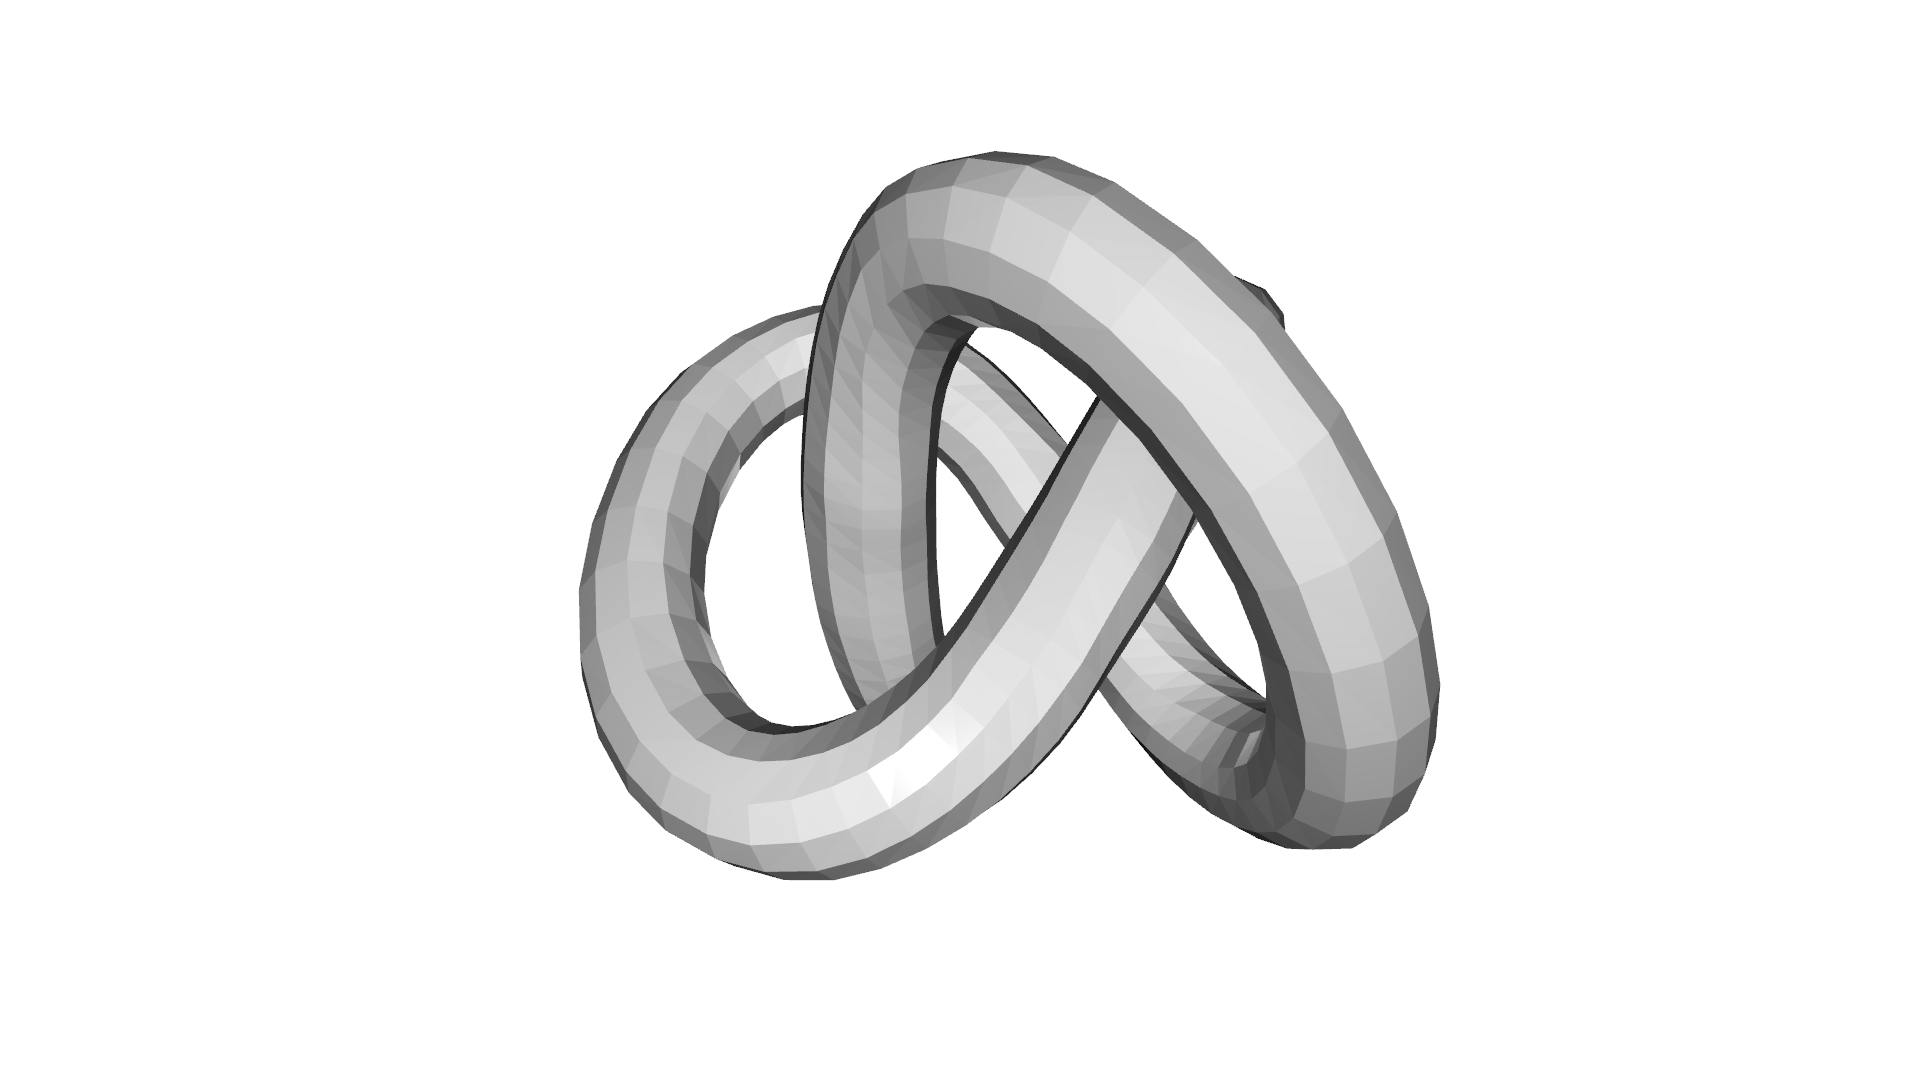

filter with Laplacian with 50 iterations


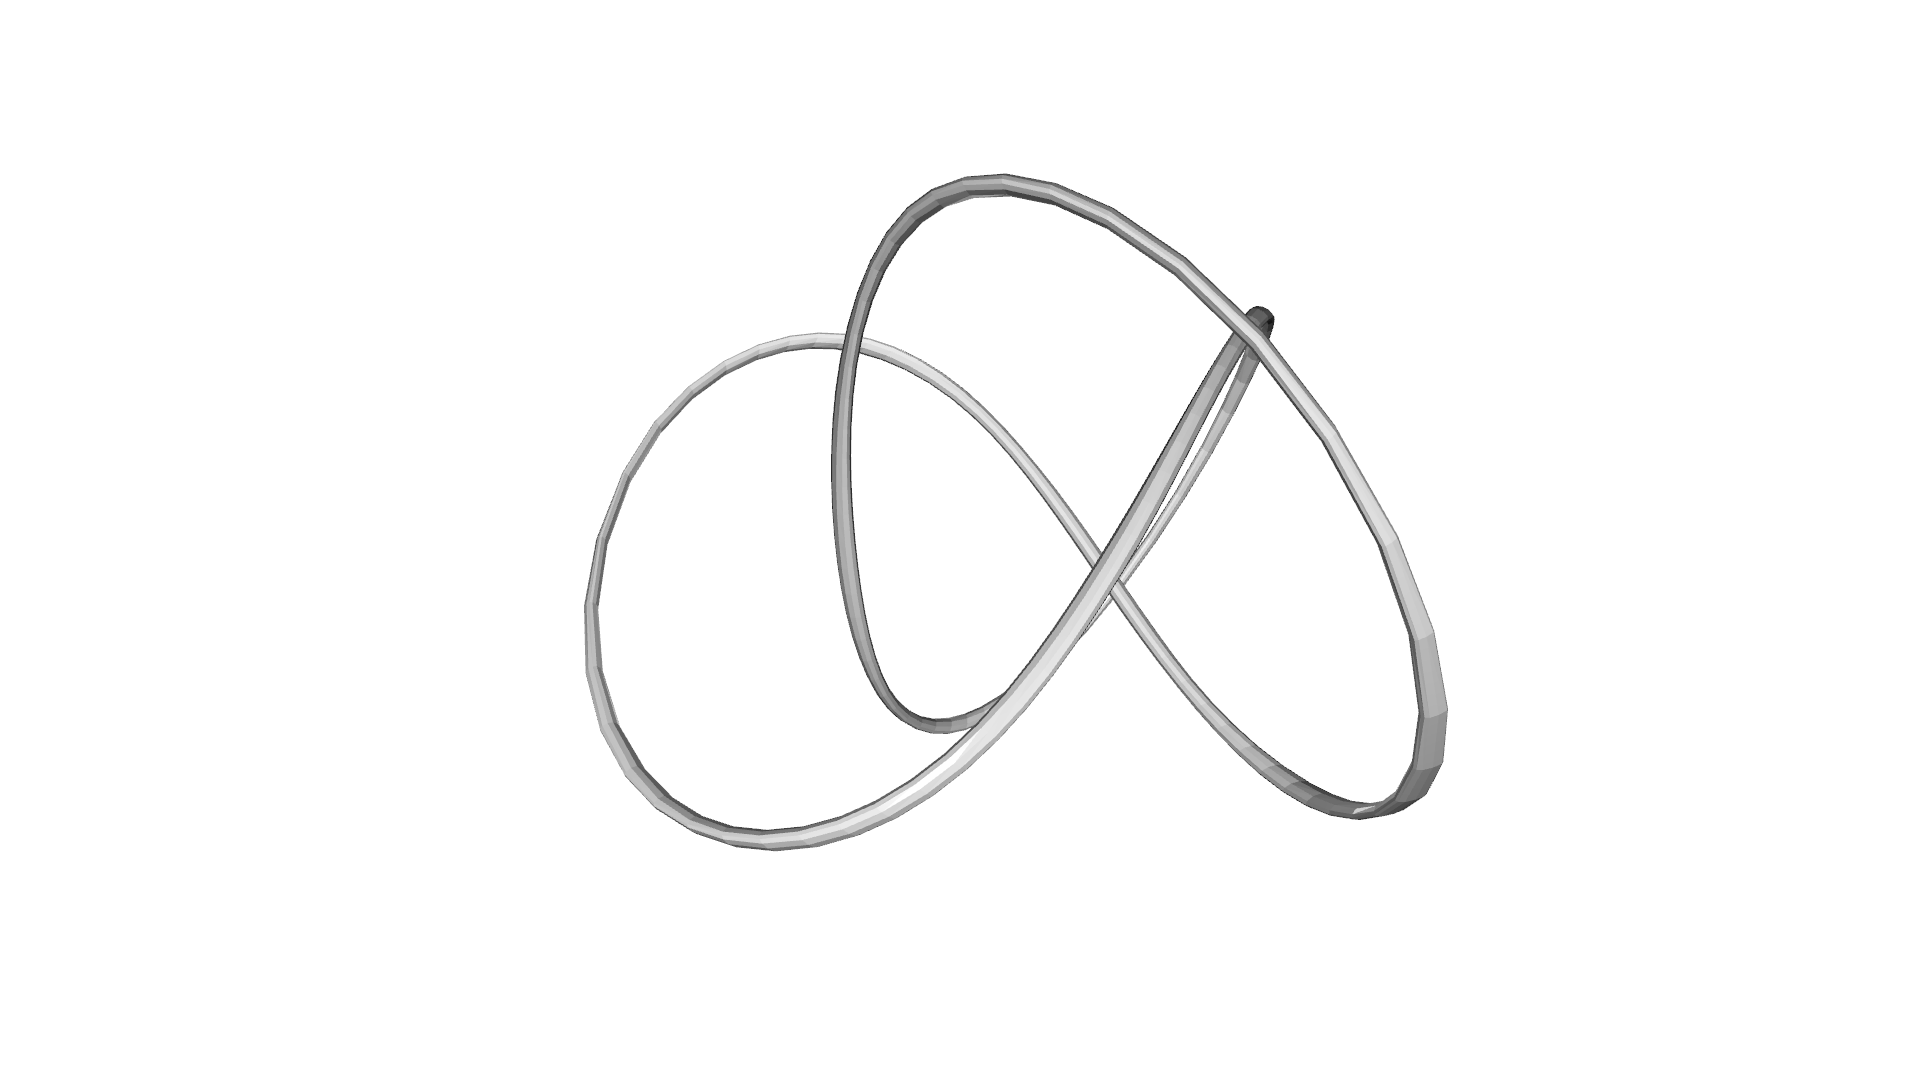

In [10]:
print('filter with Laplacian with 10 iterations')
mesh_out = mesh_in.filter_smooth_laplacian(number_of_iterations=10)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

print('filter with Laplacian with 50 iterations')
mesh_out = mesh_in.filter_smooth_laplacian(number_of_iterations=50)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

filter with Taubin with 10 iterations


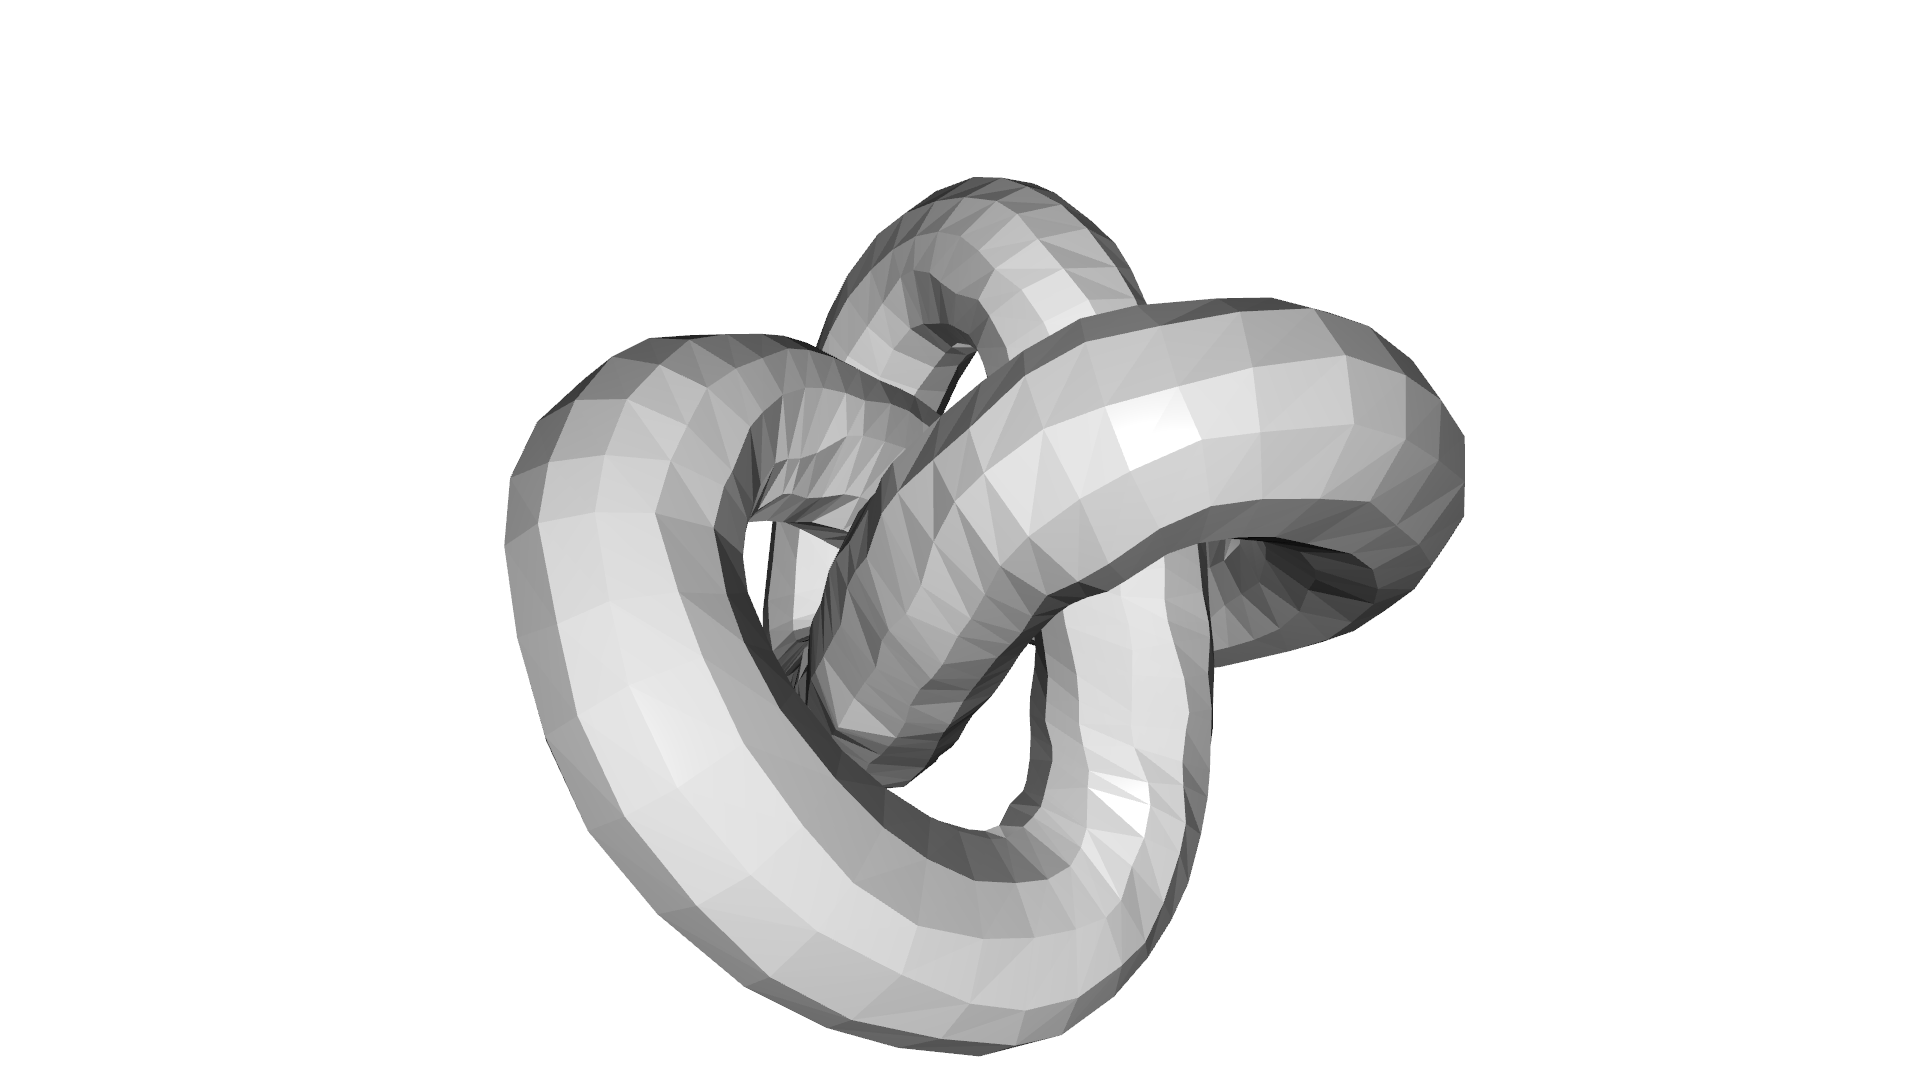

filter with Taubin with 100 iterations


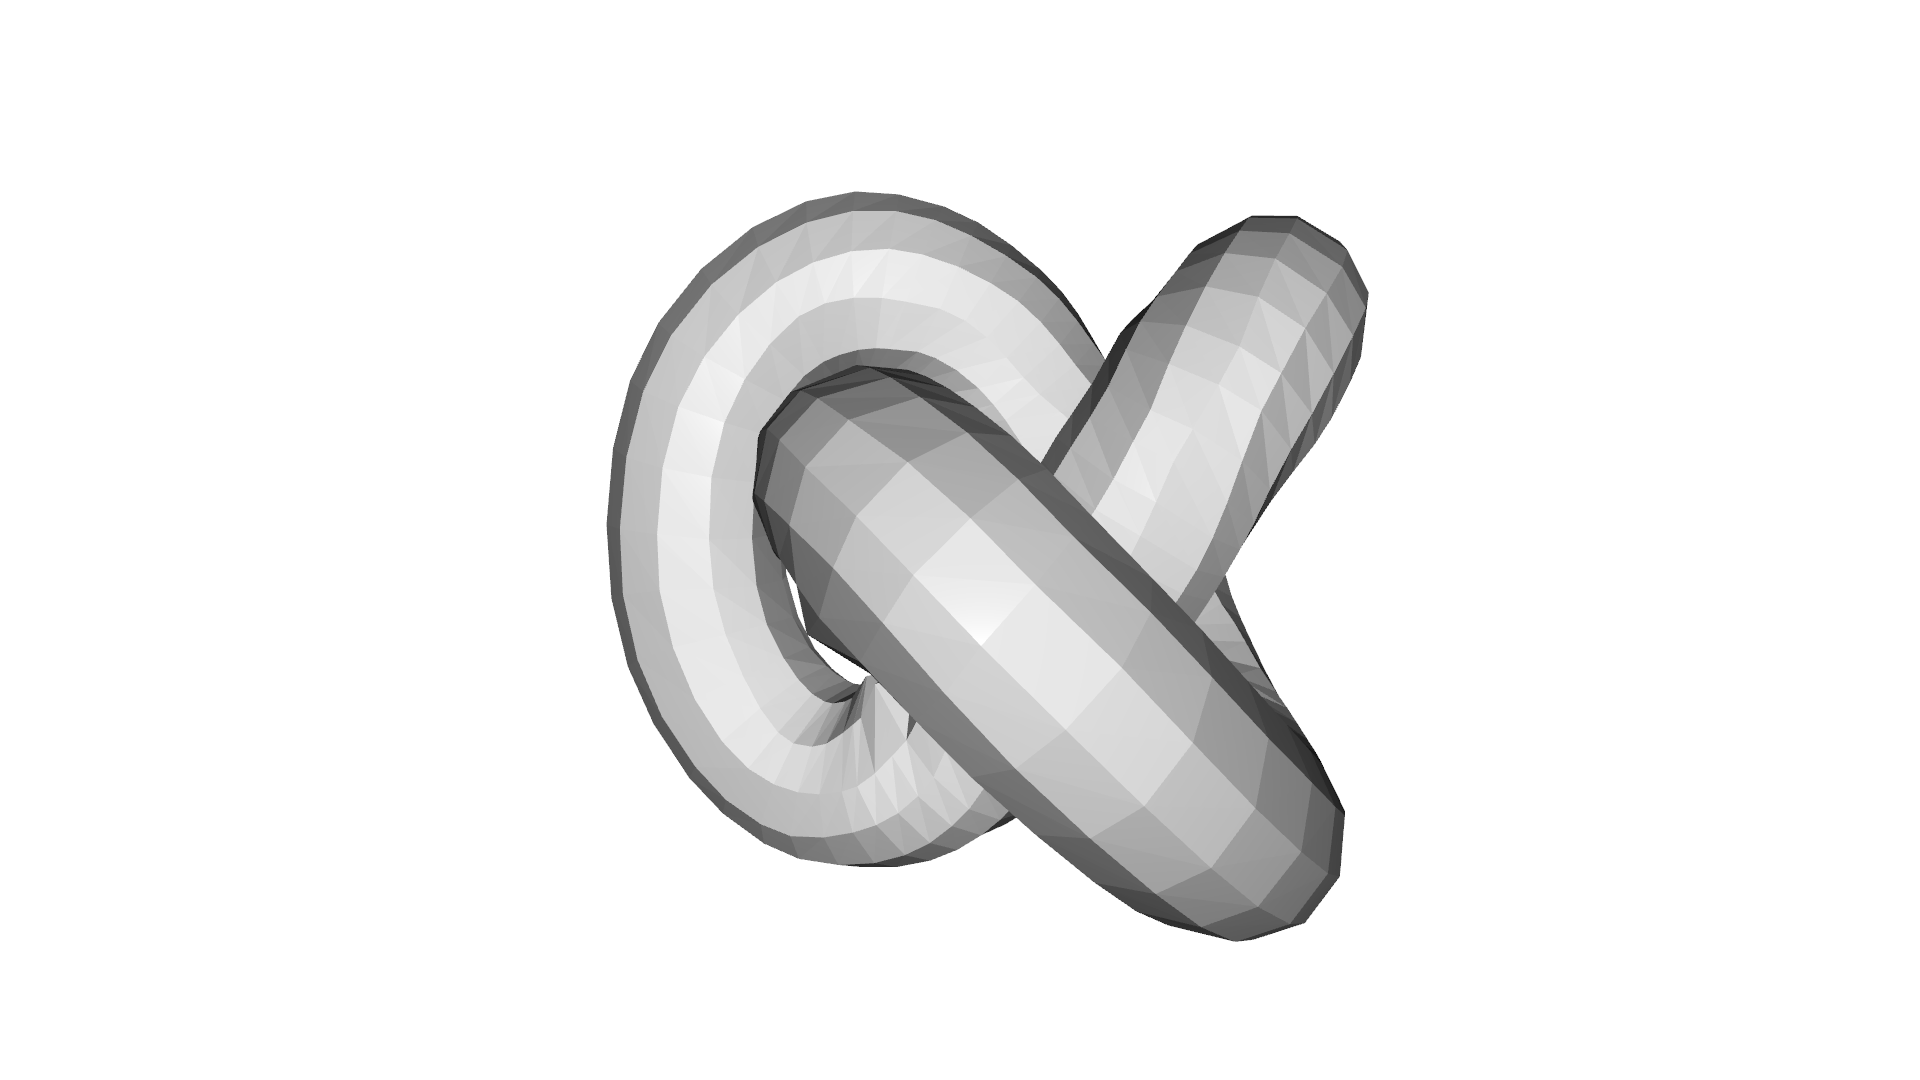

In [11]:
print('filter with Taubin with 10 iterations')
mesh_out = mesh_in.filter_smooth_taubin(number_of_iterations=10)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

print('filter with Taubin with 100 iterations')
mesh_out = mesh_in.filter_smooth_taubin(number_of_iterations=100)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_out])

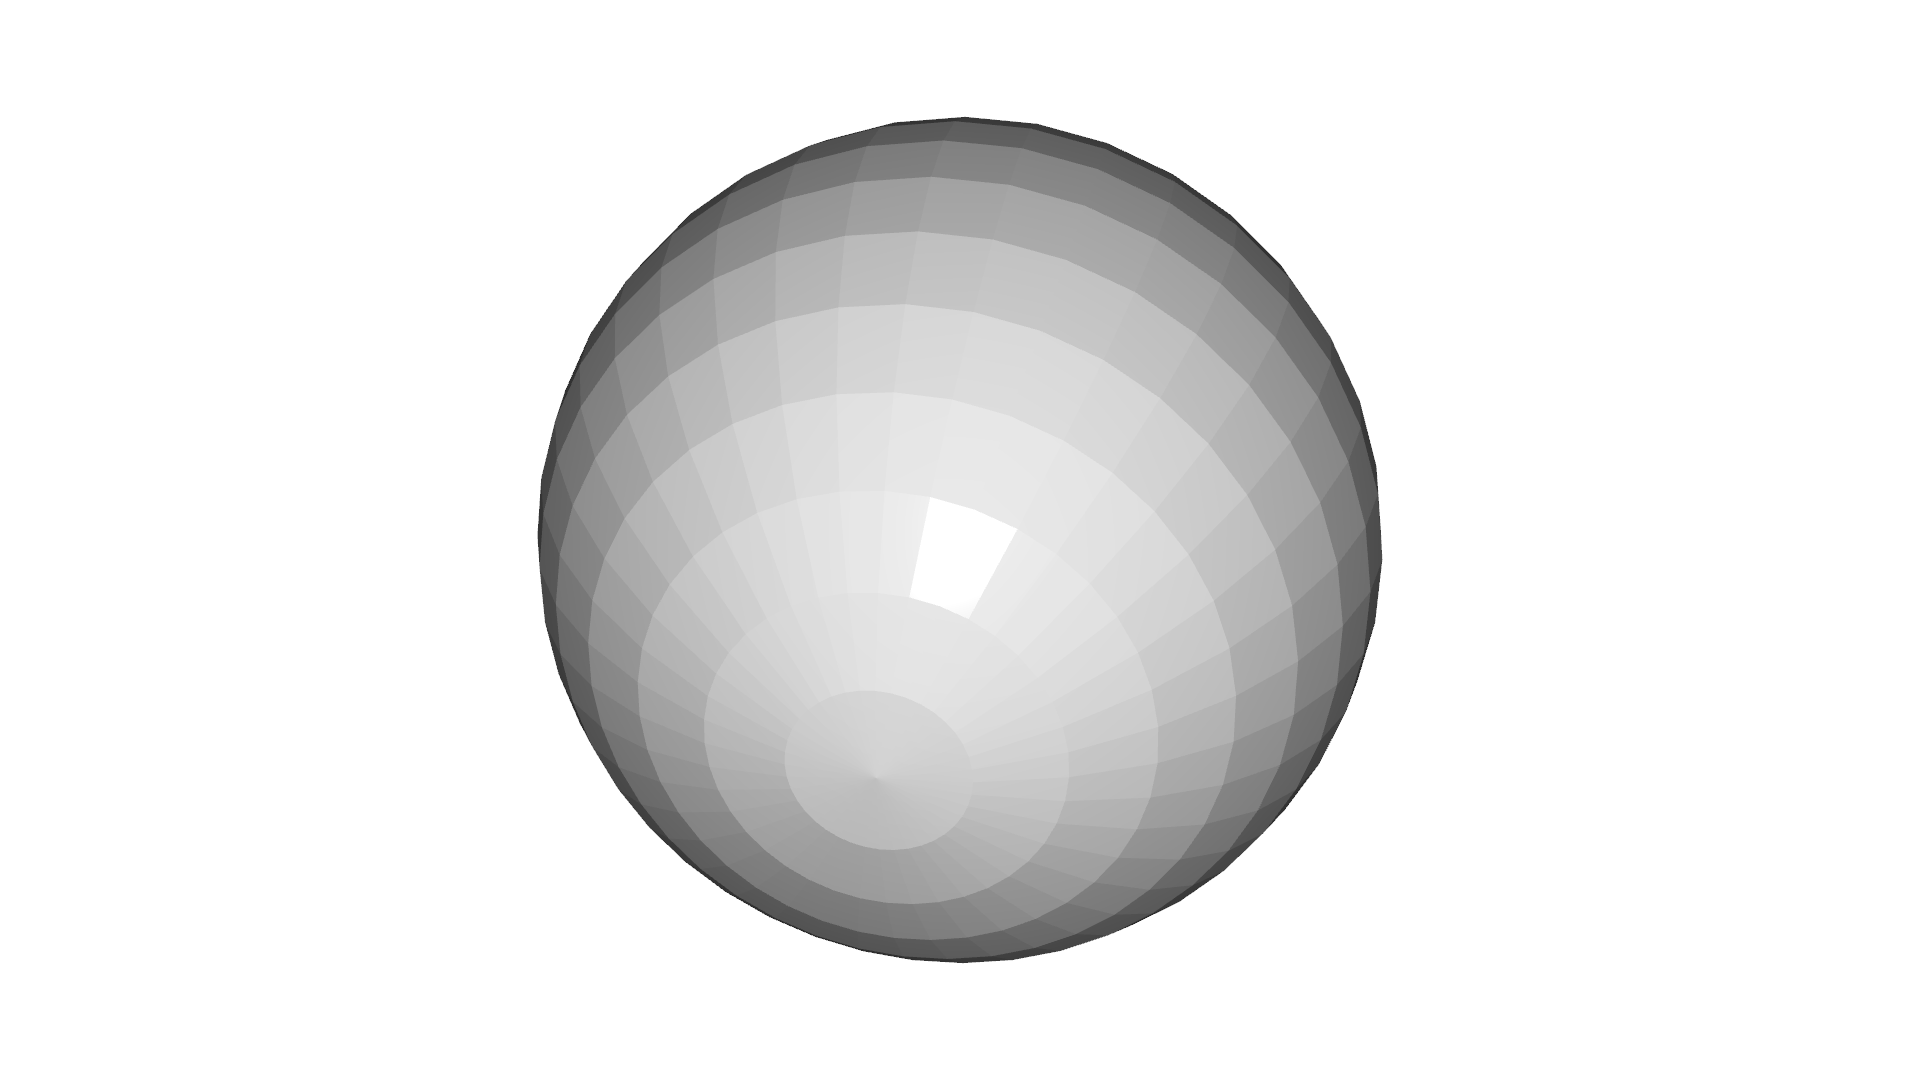

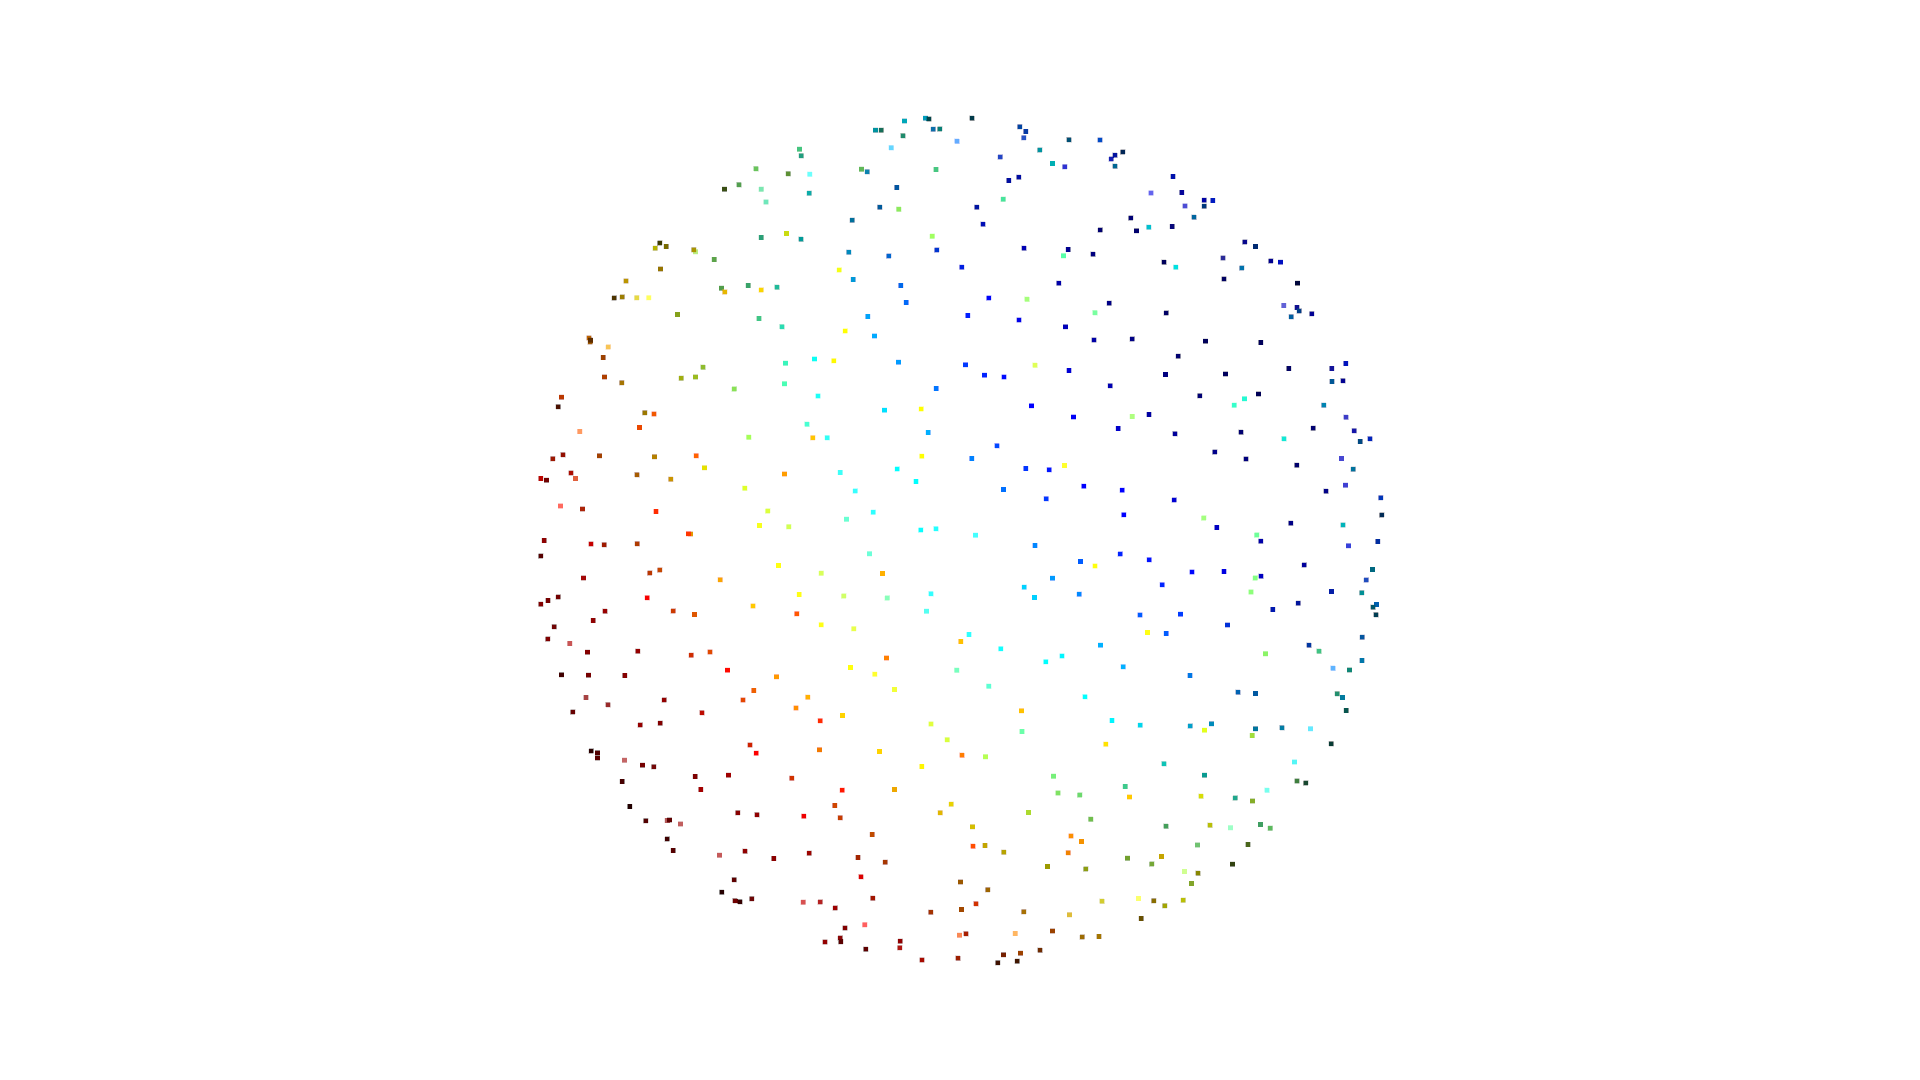

In [12]:
mesh = o3d.geometry.TriangleMesh.create_sphere()
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])
pcd = mesh.sample_points_uniformly(number_of_points=500)
o3d.visualization.draw_geometries([pcd])

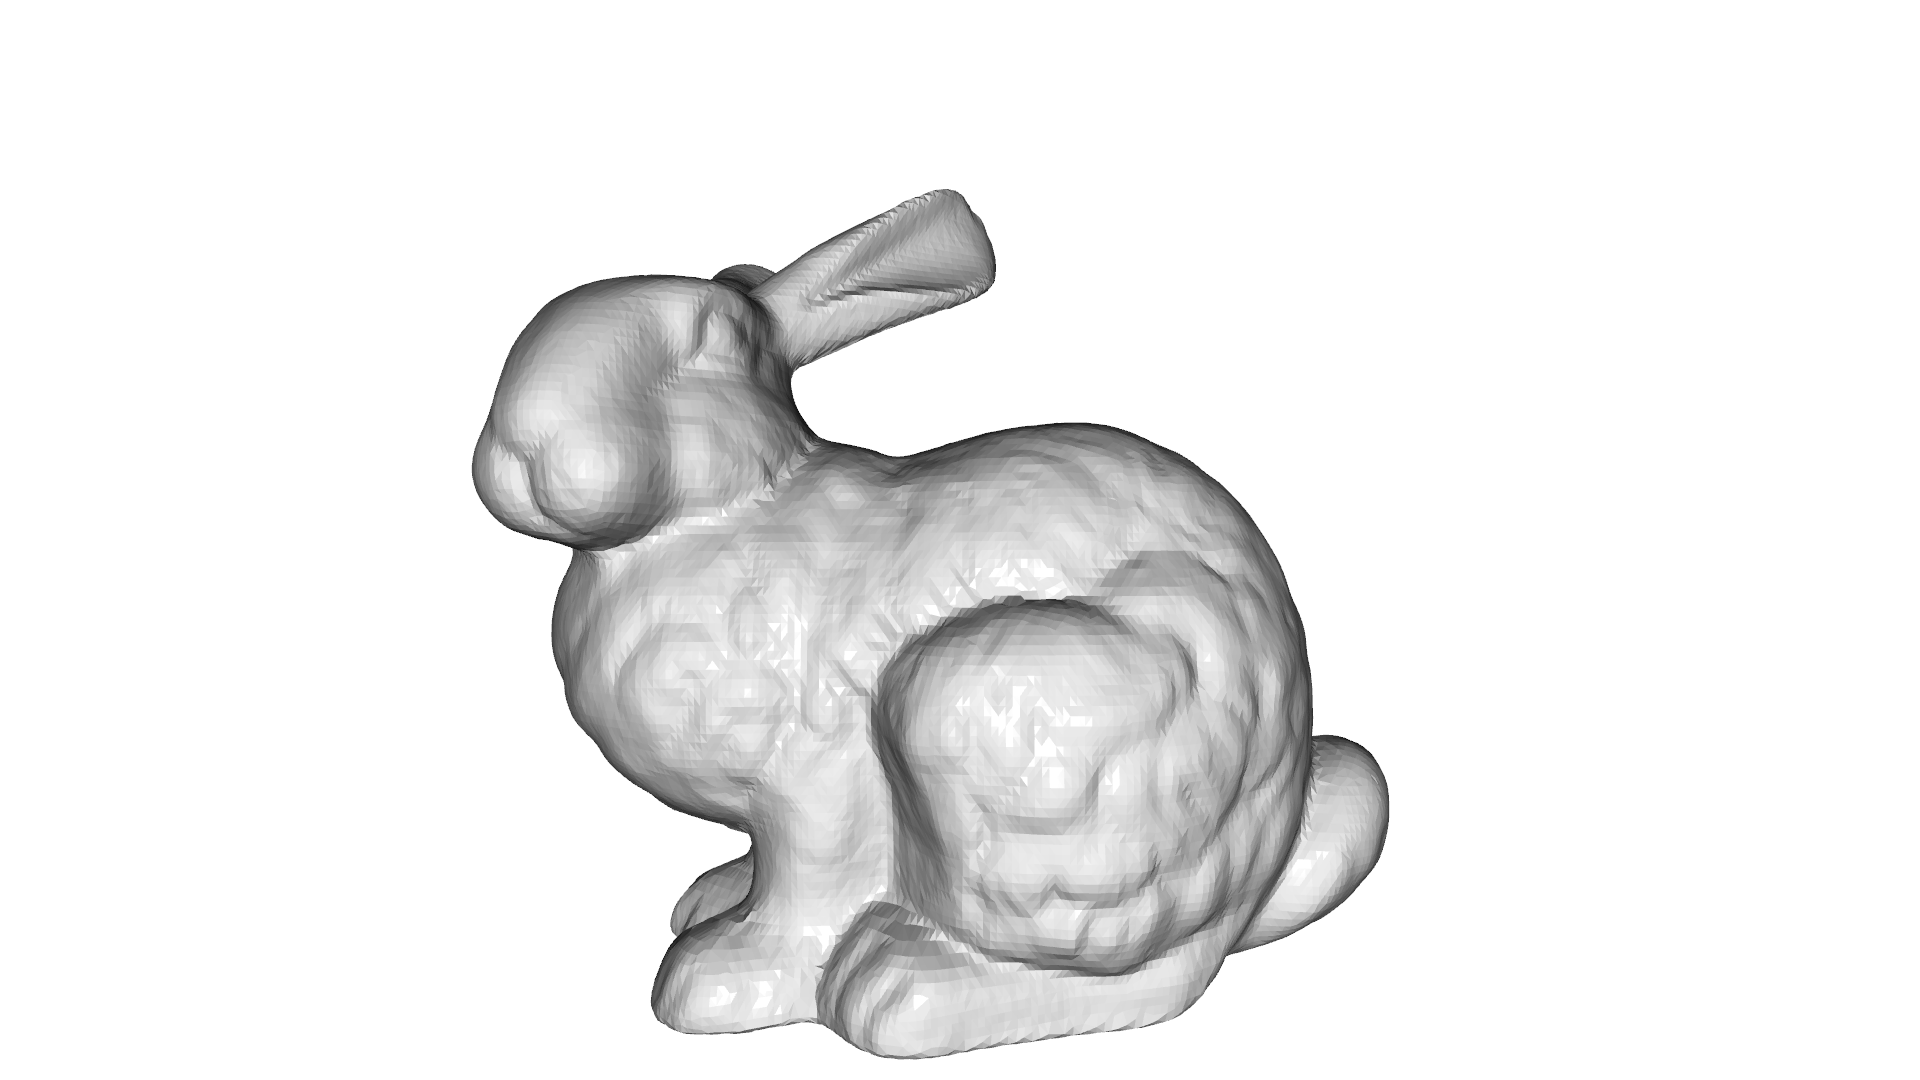

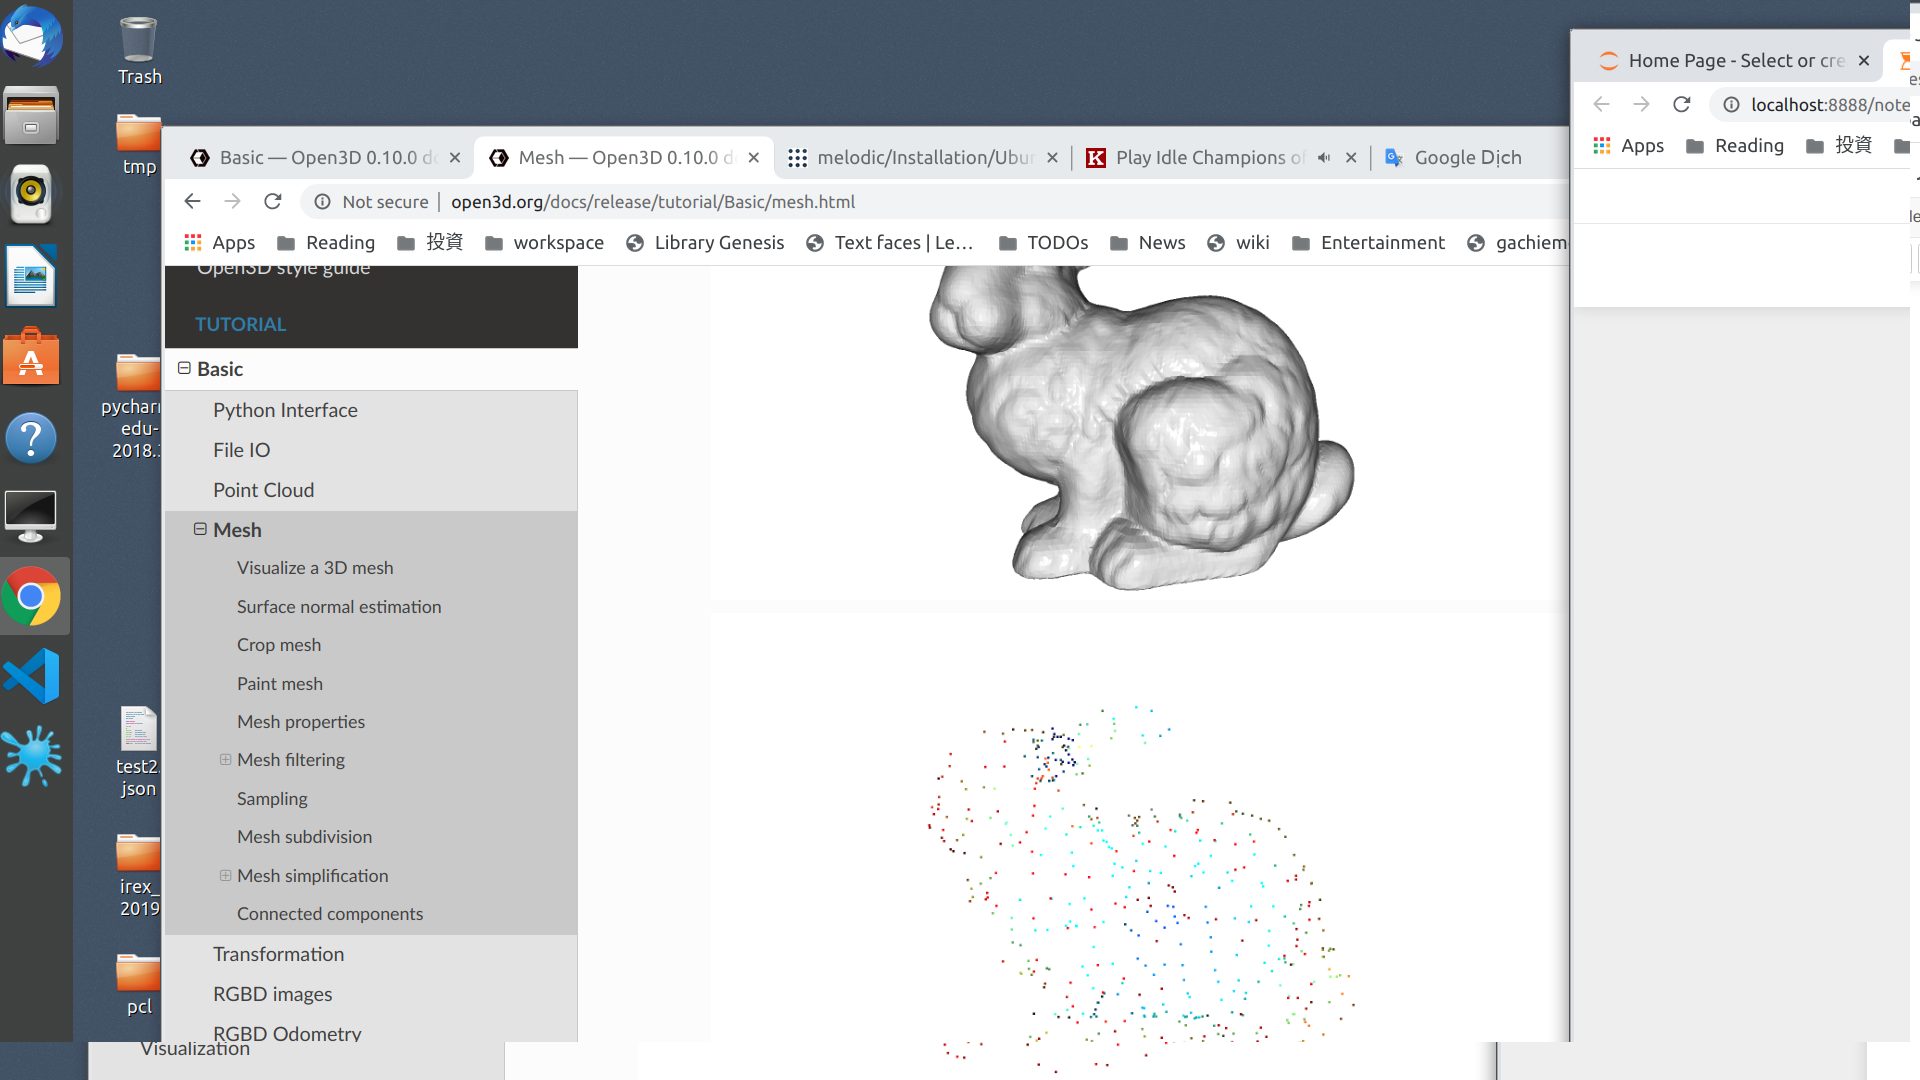

In [16]:
mesh = o3dtut.get_bunny_mesh()
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])
pcd = mesh.sample_points_uniformly(number_of_points=500)
o3d.visualization.draw_geometries([pcd])